# Comparison between "Comprehensive upper-air observation network from 1905 to present" and "Insitu IGRA radiosoundings baseline network"

**Contains modified Copernicus Climate Change Service Information 2020**
under [License](https://apps.ecmwf.int/datasets/licences/copernicus/)

*Copernicus Climate Change Service (C3S) - Upper Air Data Service (2020)*

The purpose of this IPython Notebook is to find differences in both mentioned data sets and to compare them. 

    Author: U. Voggenberger
    Date: 02.2021
    Contact: ulrich.voggenberger [at] univie.ac.at
    License: C3S, 2021


In [1]:
import pandas
import numpy as np
import sys, zipfile, os, time
import matplotlib.pyplot as plt
import glob
import datetime
import urllib3
import cdsapi
import xarray
import shutil
import warnings
warnings.filterwarnings('ignore')
sys.path.append(os.getcwd()+'/../cds-backend/code/')
import cds_eua3 as eua

In [2]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (16, 10),
         'axes.labelsize': 20,
         'axes.titlesize': 24,
         'xtick.labelsize':'medium',
         'ytick.labelsize':'medium'}
pylab.rcParams.update(params)

In [3]:
def request(rqdict, source, remove_file=True):
    t0 = time.time()

    c = cdsapi.Client()
    r = c.retrieve(
        source,rqdict)
    if True:
        r.download(target='download.zip')
        assert os.stat('download.zip').st_size == r.content_length, "Downloaded file is incomplete"
    z = zipfile.ZipFile('download.zip')
    z.extractall(path='./download/')
    z.close()
    print('Request took: ' + str(time.time() - t0) + ' seconds')
    
    files = glob.glob('./download/*.nc')
    
    if files[0].split('/')[-1].startswith('IGRA'):
        ds = xarray.open_dataset(files[0])            
        data = ds.to_dataframe()
        for i in files[1:]:
            ds = xarray.open_dataset(i)            
            data = data.append(ds.to_dataframe())

    else:
        data=eua.CDMDataset(files[0]).to_dataframe()
        for i in files[1:]:
            da = eua.CDMDataset(i).to_dataframe()
            data = data.append(da)
            
    os.remove('download.zip')
    if remove_file:
        try:
           shutil.rmtree('./download/')
        except:
           print('Error while deleting directory')

    return data

---

# Analyzing and comparing temperature values for IGRA (and its harmonized version) and Comprehensive upper-air observation network (CUON)
# Lihue Kauai 91165

In [4]:
loc = '91165'

---

## Loading Data:

The loading of the data shows if there is any differance in the retreival performance.

In [5]:
cuon = 'insitu-comprehensive-upper-air-observation-network'
igra = 'insitu-observations-igra-baseline-network'

# CUON
## Requesting the whole temperature data of Lihue Kauai:
### Request took: 30 seconds
### 1950-02-25 15:00:00 - 2020-12-31 11:09:00 -> 2176892 messurements

In [6]:
cachworkaround = np.random.random_sample()
da_c = request({
    'variable': 'temperature',
    'statid': '91165',
#     'date': '20000101-20100101',
    'optional': ['bias_estimate','obs_minus_an','obs_minus_bg'],
    'cachworkaround': cachworkaround,
}, cuon)

2021-02-16 09:42:53,184 INFO Welcome to the CDS
2021-02-16 09:42:53,185 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-comprehensive-upper-air-observation-network
2021-02-16 09:42:53,435 INFO Request is queued
2021-02-16 09:42:54,471 INFO Request is running
2021-02-16 09:43:14,445 INFO Request is completed
2021-02-16 09:43:14,445 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data1/adaptor.comprehensive_upper_air.retrieve-1613464988.1909637-15452-4-f7d0203d-a8d0-4516-bafb-752e431bb3f1.zip to download.zip (85.5M)
2021-02-16 09:43:23,246 INFO Download rate 9.7M/s   


Request took: 30.363725423812866 seconds
2021-02-16 09:43:23,383 - upperair.cdm | __init__ - DEBUG - [OPEN] ./download/dest_0-20000-0-91165_air_temperature.nc


2021-02-16 09:43:23,383 DEBUG [OPEN] ./download/dest_0-20000-0-91165_air_temperature.nc


2021-02-16 09:43:23,396 - upperair.cdm | to_dataframe - INFO - Reading Profile on slice(None, None, None)


2021-02-16 09:43:23,396 INFO Reading Profile on slice(None, None, None)


2021-02-16 09:43:24,372 - upperair.cdm | to_dataframe - DEBUG - Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


2021-02-16 09:43:24,372 DEBUG Read variables: dict_keys(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg', 'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory', 'trajectory_index', 'trajectory_label'])


In [7]:
da_c

bias_estimate    lat         lon  obs  obs_minus_an  obs_minus_bg  \
0             0.726633  21.98 -159.350006    0      3.083594      4.175976   
1             0.770354  21.98 -159.350006    0      1.564324      2.512310   
2             0.807320  21.98 -159.350006    0      0.848184      0.877000   
3             0.516780  21.98 -159.350006    0     -0.657568     -2.373220   
4             0.031261  21.98 -159.350006    0     -0.540770     -1.176880   
...                ...    ...         ...  ...           ...           ...   
2176887       0.000605  21.98 -159.350006    0     -1.594819     -1.553197   
2176888      -0.004821  21.98 -159.350006    0     -0.544296     -0.448665   
2176889      -0.004851  21.98 -159.350006    0     -0.598078     -0.506485   
2176890      -0.040000  21.98 -159.350006    0      1.210383      1.679360   
2176891      -0.040000  21.98 -159.350006    0      1.596008      2.269374   

             plev    report_id            station_id          ta  \
0          5000.0  20000000141  LIHUE, KAUAI, HAWAII  212.149994   
1          6000.0  20000000141  LIHUE, KAUAI, HAWAII  204.149994   
2          7000.0  20000000141  LIHUE, KAUAI, HAWAII  197.850006   
3          8000.0  20000000141  LIHUE, KAUAI, HAWAII  192.350006   
4         10000.0  20000000141  LIHUE, KAUAI, HAWAII  193.250000   
...           ...          ...                   ...         ...   
2176887   90800.0  10000039717  LIHUE, KAUAI, HAWAII  287.950012   
2176888   92400.0  10000039717  LIHUE, KAUAI, HAWAII  289.950012   
2176889   92500.0  10000039717  LIHUE, KAUAI, HAWAII  289.950012   
2176890  100000.0  10000039717  LIHUE, KAUAI, HAWAII  296.350006   
2176891  101400.0  10000039717  LIHUE, KAUAI, HAWAII  297.549988   

                       time trajectory_label  
0       1950-02-25 15:00:00      20000000000  
1       1950-02-25 15:00:00      20000000001  
2       1950-02-25 15:00:00      20000000001  
3       1950-02-25 15:00:00      20000000001  
4       1950-02-25 15:00:00      20000000001  
...                     ...              ...  
2176887 2020-12-31 11:09:00      20000000000  
2176888 2020-12-31 11:09:00      20000000000  
2176889 2020-12-31 11:09:00      20000000000  
2176890 2020-12-31 11:09:00      20000000000  
2176891 2020-12-31 11:09:00      20000000000  

[2176892 rows x 12 columns]

# IGRA
## Requesting the whole temperature data of Lihue Kauai:
### Request took: 500 seconds
### 1978-04-01 00:00:00 - 2020-04-12 12:00:00 -> 3934225 messurements

In [8]:
da_i = request({
    'source': 'IGRA',
    'variable': ['air_temperature'],
    'station_name': ['USM00091165'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 09:43:31,438 INFO Welcome to the CDS
2021-02-16 09:43:31,439 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 09:43:31,481 INFO Request is queued
2021-02-16 09:43:32,516 INFO Request is running
2021-02-16 09:51:50,162 INFO Request is completed
2021-02-16 09:51:50,162 INFO Downloading http://136.156.132.204/cache-compute-0001/cache/data2/adaptor.insitu_reference.retrieve_test-1613465480.7480786-10678-4-91723f09-b833-4f51-8e31-94f58639ac64.zip to download.zip (30.3M)
2021-02-16 09:51:50,799 INFO Download rate 47.6M/s  


Request took: 500.2460618019104 seconds


In [29]:
da_i

station_name    report_timestamp  report_id   longitude   latitude  \
index                                                                        
0        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
1        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
2        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
3        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
4        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
...              ...                 ...        ...         ...        ...   
3934220  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934221  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934222  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934223  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934224  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   

         air_pressure  air_temperature  
index                                   
0                 NaN              NaN  
1                 NaN              NaN  
2               910.0       237.649994  
3              1000.0       237.250000  
4              1200.0       230.350006  
...               ...              ...  
3934220        9820.0       202.850006  
3934221       85200.0       286.549988  
3934222        4290.0       210.649994  
3934223       79800.0       285.750000  
3934224        6400.0       205.850006  

[3934225 rows x 7 columns]

# IGRA Harmonized
## Requesting the whole temperature data of Lihue Kauai:
### Request took: 259 seconds
### 1978-01-02 00:00:00 - 2020-04-12 11:03:00 -> 2187907 messurements

In [10]:
da_ih = request({
    'source': 'IGRA_H',
    'variable': ['air_temperature'],
    'station_name': ['USM00091165'],
    'period': '1978-01-01/2020-12-31',
}, igra)

2021-02-16 09:51:54,346 INFO Welcome to the CDS
2021-02-16 09:51:54,346 INFO Sending request to https://sis-dev.climate.copernicus.eu/api/v2/resources/insitu-observations-igra-baseline-network
2021-02-16 09:51:54,389 INFO Request is queued
2021-02-16 09:51:55,425 INFO Request is running
2021-02-16 09:56:12,675 INFO Request is completed
2021-02-16 09:56:12,676 INFO Downloading http://136.156.132.176/cache-compute-0002/cache/data2/adaptor.insitu_reference.retrieve_test-1613465731.8823192-14715-9-0793a462-2337-4fc8-8b87-70f786daf1ce.zip to download.zip (29.8M)
2021-02-16 09:56:13,316 INFO Download rate 46.7M/s  


Request took: 259.82707500457764 seconds


In [30]:
da_ih

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
1        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
2        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
3        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
4        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
...              ...                 ...                     ...        ...   
2187902  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187903  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187904  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187905  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187906  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   

         longitude   latitude  height_of_station_above_sea_level  \
index                                                              
0         -159.347  21.993299                          32.299999   
1         -159.347  21.993299                          32.299999   
2         -159.347  21.993299                          32.299999   
3         -159.347  21.993299                          32.299999   
4         -159.347  21.993299                          32.299999   
...            ...        ...                                ...   
2187902   -159.347  21.993299                          32.299999   
2187903   -159.347  21.993299                          32.299999   
2187904   -159.347  21.993299                          32.299999   
2187905   -159.347  21.993299                          32.299999   
2187906   -159.347  21.993299                          32.299999   

         air_pressure  air_temperature  
index                                   
0                2400       220.449997  
1               35400       244.949997  
2                4500       211.149994  
3               10000              NaN  
4               25000              NaN  
...               ...              ...  
2187902         86000       285.750000  
2187903          4810       213.250000  
2187904          2000              NaN  
2187905         20000              NaN  
2187906          1000              NaN  

[2187907 rows x 9 columns]

In [52]:
da_ih[da_ih.air_pressure == 30000].dropna()

Empty DataFrame
Columns: [station_name, report_timestamp, actual_time, report_id, longitude, latitude, height_of_station_above_sea_level, air_pressure, air_temperature]
Index: []

In [53]:
da_ih[da_ih.air_pressure == 50000].dropna()

Empty DataFrame
Columns: [station_name, report_timestamp, actual_time, report_id, longitude, latitude, height_of_station_above_sea_level, air_pressure, air_temperature]
Index: []

In [54]:
da_ih[da_ih.air_pressure == 85000].dropna()

Empty DataFrame
Columns: [station_name, report_timestamp, actual_time, report_id, longitude, latitude, height_of_station_above_sea_level, air_pressure, air_temperature]
Index: []

---

In [31]:
comp = da_c
igra = da_i
igrah = da_ih

In [32]:
igra

station_name    report_timestamp  report_id   longitude   latitude  \
index                                                                        
0        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
1        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
2        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
3        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
4        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
...              ...                 ...        ...         ...        ...   
3934220  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934221  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934222  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934223  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934224  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   

         air_pressure  air_temperature  
index                                   
0                 NaN              NaN  
1                 NaN              NaN  
2               910.0       237.649994  
3              1000.0       237.250000  
4              1200.0       230.350006  
...               ...              ...  
3934220        9820.0       202.850006  
3934221       85200.0       286.549988  
3934222        4290.0       210.649994  
3934223       79800.0       285.750000  
3934224        6400.0       205.850006  

[3934225 rows x 7 columns]

In [33]:
igrah

station_name    report_timestamp             actual_time  report_id  \
index                                                                         
0        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
1        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
2        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
3        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
4        USM00091165 1978-01-02 00:00:00  1978-01-02 00:00:00+00    2102956   
...              ...                 ...                     ...        ...   
2187902  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187903  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187904  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187905  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   
2187906  USM00091165 2020-04-12 12:00:00  2020-04-12 11:03:00+00    2116034   

         longitude   latitude  height_of_station_above_sea_level  \
index                                                              
0         -159.347  21.993299                          32.299999   
1         -159.347  21.993299                          32.299999   
2         -159.347  21.993299                          32.299999   
3         -159.347  21.993299                          32.299999   
4         -159.347  21.993299                          32.299999   
...            ...        ...                                ...   
2187902   -159.347  21.993299                          32.299999   
2187903   -159.347  21.993299                          32.299999   
2187904   -159.347  21.993299                          32.299999   
2187905   -159.347  21.993299                          32.299999   
2187906   -159.347  21.993299                          32.299999   

         air_pressure  air_temperature  
index                                   
0                2400       220.449997  
1               35400       244.949997  
2                4500       211.149994  
3               10000              NaN  
4               25000              NaN  
...               ...              ...  
2187902         86000       285.750000  
2187903          4810       213.250000  
2187904          2000              NaN  
2187905         20000              NaN  
2187906          1000              NaN  

[2187907 rows x 9 columns]

In [34]:
orig_cols_comp = comp.columns
print('orig_cols_comp: ', orig_cols_comp)
orig_cols_igra = igrah.columns
print('orig_cols_igra: ', orig_cols_igra)

df = pandas.merge(igra, igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
print('getting igra and igrah to same len')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

new_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igrah.columns=newcols
print('new_igrah')
display(new_igrah)

new_igra = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in new_igra.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
new_igra.columns=newcols
print('new_igra')
display(new_igra)

print('cutting those measurments out, which are both in igrah and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igrah, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igrah = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igrah.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igrah.columns=newcols
for col in adj_igrah.columns:
    if not col in orig_cols_igra:
        adj_igrah = adj_igrah.drop(columns=col)
print('adj_igrah')
display(adj_igrah)

adj_comp = (both.drop([col for col in both.columns if (('_y' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_comp.columns:
    if col[-2:] == '_x':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_comp.columns=newcols
adj_comp = adj_comp.rename(columns={"report_timestamp": "time", "air_pressure": "plev"})
for col in adj_comp.columns:
    if not col in orig_cols_comp:
        adj_comp = adj_comp.drop(columns=col)
print('adj_comp')
display(adj_comp)

print('cutting those measurments out, which are both in igra and comp')
df = pandas.merge(comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"}), new_igra, on=['report_timestamp','air_pressure'], how='left', indicator='Exist')
display(df)
both = df[np.where(df.Exist == 'both', True, False)]

adj_igra = (both.drop([col for col in both.columns if (('_x' in col) or (col == 'Exist'))],axis=1))
newcols = []
for col in adj_igra.columns:
    if col[-2:] == '_y':
        newcols.append(col[:-2])
    else:
        newcols.append(col)
adj_igra.columns=newcols
for col in adj_igra.columns:
    if not col in orig_cols_igra:
        adj_igra = adj_igra.drop(columns=col)
print('adj_igra')
display(adj_igra)


# igra = igra[df.Exist]
# igra

# comp.rename(columns={"time": "report_timestamp", "plev": "air_pressure"})

orig_cols_comp:  Index(['bias_estimate', 'lat', 'lon', 'obs', 'obs_minus_an', 'obs_minus_bg',
       'plev', 'report_id', 'station_id', 'ta', 'time', 'trajectory_label'],
      dtype='object')
orig_cols_igra:  Index(['station_name', 'report_timestamp', 'actual_time', 'report_id',
       'longitude', 'latitude', 'height_of_station_above_sea_level',
       'air_pressure', 'air_temperature'],
      dtype='object')
getting igra and igrah to same len


station_name_x    report_timestamp  report_id_x  longitude_x  \
0          USM00091165 1978-04-01 00:00:00     32192032  -159.346695   
1          USM00091165 1978-04-01 00:00:00     32192032  -159.346695   
2          USM00091165 1978-04-01 00:00:00     32192032  -159.346695   
3          USM00091165 1978-04-01 00:00:00     32192032  -159.346695   
4          USM00091165 1978-04-01 00:00:00     32192032  -159.346695   
...                ...                 ...          ...          ...   
3934220    USM00091165 2020-04-12 12:00:00     32208571  -159.346695   
3934221    USM00091165 2020-04-12 12:00:00     32208571  -159.346695   
3934222    USM00091165 2020-04-12 12:00:00     32208571  -159.346695   
3934223    USM00091165 2020-04-12 12:00:00     32208571  -159.346695   
3934224    USM00091165 2020-04-12 12:00:00     32208571  -159.346695   

         latitude_x  air_pressure  air_temperature_x station_name_y  \
0         21.993299           NaN                NaN            NaN   
1         21.993299           NaN                NaN            NaN   
2         21.993299         910.0         237.649994            NaN   
3         21.993299        1000.0         237.250000    USM00091165   
4         21.993299        1200.0         230.350006    USM00091165   
...             ...           ...                ...            ...   
3934220   21.993299        9820.0         202.850006    USM00091165   
3934221   21.993299       85200.0         286.549988    USM00091165   
3934222   21.993299        4290.0         210.649994    USM00091165   
3934223   21.993299       79800.0         285.750000    USM00091165   
3934224   21.993299        6400.0         205.850006    USM00091165   

                    actual_time  report_id_y  longitude_y  latitude_y  \
0                           NaN          NaN          NaN         NaN   
1                           NaN          NaN          NaN         NaN   
2                           NaN          NaN          NaN         NaN   
3        1978-04-01 00:00:00+00    2097504.0     -159.347   21.993299   
4        1978-04-01 00:00:00+00    2097504.0     -159.347   21.993299   
...                         ...          ...          ...         ...   
3934220  2020-04-12 11:03:00+00    2116034.0     -159.347   21.993299   
3934221  2020-04-12 11:03:00+00    2116034.0     -159.347   21.993299   
3934222  2020-04-12 11:03:00+00    2116034.0     -159.347   21.993299   
3934223  2020-04-12 11:03:00+00    2116034.0     -159.347   21.993299   
3934224  2020-04-12 11:03:00+00    2116034.0     -159.347   21.993299   

         height_of_station_above_sea_level  air_temperature_y      Exist  
0                                      NaN                NaN  left_only  
1                                      NaN                NaN  left_only  
2                                      NaN                NaN  left_only  
3                                32.299999                NaN       both  
4                                32.299999         230.350006       both  
...                                    ...                ...        ...  
3934220                          32.299999         202.850006       both  
3934221                          32.299999         286.549988       both  
3934222                          32.299999         210.649994       both  
3934223                          32.299999         285.750000       both  
3934224                          32.299999         205.850006       both  

[3934225 rows x 15 columns]

new_igrah


report_timestamp  air_pressure station_name  \
3       1978-04-01 00:00:00        1000.0  USM00091165   
4       1978-04-01 00:00:00        1200.0  USM00091165   
5       1978-04-01 00:00:00        1700.0  USM00091165   
6       1978-04-01 00:00:00        2000.0  USM00091165   
7       1978-04-01 00:00:00        3000.0  USM00091165   
...                     ...           ...          ...   
3934220 2020-04-12 12:00:00        9820.0  USM00091165   
3934221 2020-04-12 12:00:00       85200.0  USM00091165   
3934222 2020-04-12 12:00:00        4290.0  USM00091165   
3934223 2020-04-12 12:00:00       79800.0  USM00091165   
3934224 2020-04-12 12:00:00        6400.0  USM00091165   

                    actual_time  report_id  longitude   latitude  \
3        1978-04-01 00:00:00+00  2097504.0   -159.347  21.993299   
4        1978-04-01 00:00:00+00  2097504.0   -159.347  21.993299   
5        1978-04-01 00:00:00+00  2097504.0   -159.347  21.993299   
6        1978-04-01 00:00:00+00  2097504.0   -159.347  21.993299   
7        1978-04-01 00:00:00+00  2097504.0   -159.347  21.993299   
...                         ...        ...        ...        ...   
3934220  2020-04-12 11:03:00+00  2116034.0   -159.347  21.993299   
3934221  2020-04-12 11:03:00+00  2116034.0   -159.347  21.993299   
3934222  2020-04-12 11:03:00+00  2116034.0   -159.347  21.993299   
3934223  2020-04-12 11:03:00+00  2116034.0   -159.347  21.993299   
3934224  2020-04-12 11:03:00+00  2116034.0   -159.347  21.993299   

         height_of_station_above_sea_level  air_temperature  
3                                32.299999              NaN  
4                                32.299999       230.350006  
5                                32.299999       229.050003  
6                                32.299999              NaN  
7                                32.299999              NaN  
...                                    ...              ...  
3934220                          32.299999       202.850006  
3934221                          32.299999       286.549988  
3934222                          32.299999       210.649994  
3934223                          32.299999       285.750000  
3934224                          32.299999       205.850006  

[2145979 rows x 9 columns]

new_igra


station_name    report_timestamp  report_id   longitude   latitude  \
3        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
4        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
5        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
6        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
7        USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
...              ...                 ...        ...         ...        ...   
3934220  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934221  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934222  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934223  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   
3934224  USM00091165 2020-04-12 12:00:00   32208571 -159.346695  21.993299   

         air_pressure  air_temperature             actual_time  \
3              1000.0       237.250000  1978-04-01 00:00:00+00   
4              1200.0       230.350006  1978-04-01 00:00:00+00   
5              1700.0       229.050003  1978-04-01 00:00:00+00   
6              2000.0       225.550003  1978-04-01 00:00:00+00   
7              3000.0       217.050003  1978-04-01 00:00:00+00   
...               ...              ...                     ...   
3934220        9820.0       202.850006  2020-04-12 11:03:00+00   
3934221       85200.0       286.549988  2020-04-12 11:03:00+00   
3934222        4290.0       210.649994  2020-04-12 11:03:00+00   
3934223       79800.0       285.750000  2020-04-12 11:03:00+00   
3934224        6400.0       205.850006  2020-04-12 11:03:00+00   

         height_of_station_above_sea_level  
3                                32.299999  
4                                32.299999  
5                                32.299999  
6                                32.299999  
7                                32.299999  
...                                    ...  
3934220                          32.299999  
3934221                          32.299999  
3934222                          32.299999  
3934223                          32.299999  
3934224                          32.299999  

[2145979 rows x 9 columns]

cutting those measurments out, which are both in igrah and comp


bias_estimate    lat         lon  obs  obs_minus_an  obs_minus_bg  \
0             0.726633  21.98 -159.350006    0      3.083594      4.175976   
1             0.770354  21.98 -159.350006    0      1.564324      2.512310   
2             0.807320  21.98 -159.350006    0      0.848184      0.877000   
3             0.516780  21.98 -159.350006    0     -0.657568     -2.373220   
4             0.031261  21.98 -159.350006    0     -0.540770     -1.176880   
...                ...    ...         ...  ...           ...           ...   
2176887       0.000605  21.98 -159.350006    0     -1.594819     -1.553197   
2176888      -0.004821  21.98 -159.350006    0     -0.544296     -0.448665   
2176889      -0.004851  21.98 -159.350006    0     -0.598078     -0.506485   
2176890      -0.040000  21.98 -159.350006    0      1.210383      1.679360   
2176891      -0.040000  21.98 -159.350006    0      1.596008      2.269374   

         air_pressure  report_id_x            station_id          ta  \
0              5000.0  20000000141  LIHUE, KAUAI, HAWAII  212.149994   
1              6000.0  20000000141  LIHUE, KAUAI, HAWAII  204.149994   
2              7000.0  20000000141  LIHUE, KAUAI, HAWAII  197.850006   
3              8000.0  20000000141  LIHUE, KAUAI, HAWAII  192.350006   
4             10000.0  20000000141  LIHUE, KAUAI, HAWAII  193.250000   
...               ...          ...                   ...         ...   
2176887       90800.0  10000039717  LIHUE, KAUAI, HAWAII  287.950012   
2176888       92400.0  10000039717  LIHUE, KAUAI, HAWAII  289.950012   
2176889       92500.0  10000039717  LIHUE, KAUAI, HAWAII  289.950012   
2176890      100000.0  10000039717  LIHUE, KAUAI, HAWAII  296.350006   
2176891      101400.0  10000039717  LIHUE, KAUAI, HAWAII  297.549988   

           report_timestamp trajectory_label station_name actual_time  \
0       1950-02-25 15:00:00      20000000000          NaN         NaN   
1       1950-02-25 15:00:00      20000000001          NaN         NaN   
2       1950-02-25 15:00:00      20000000001          NaN         NaN   
3       1950-02-25 15:00:00      20000000001          NaN         NaN   
4       1950-02-25 15:00:00      20000000001          NaN         NaN   
...                     ...              ...          ...         ...   
2176887 2020-12-31 11:09:00      20000000000          NaN         NaN   
2176888 2020-12-31 11:09:00      20000000000          NaN         NaN   
2176889 2020-12-31 11:09:00      20000000000          NaN         NaN   
2176890 2020-12-31 11:09:00      20000000000          NaN         NaN   
2176891 2020-12-31 11:09:00      20000000000          NaN         NaN   

         report_id_y  longitude  latitude  height_of_station_above_sea_level  \
0                NaN        NaN       NaN                                NaN   
1                NaN        NaN       NaN                                NaN   
2                NaN        NaN       NaN                                NaN   
3                NaN        NaN       NaN                                NaN   
4                NaN        NaN       NaN                                NaN   
...              ...        ...       ...                                ...   
2176887          NaN        NaN       NaN                                NaN   
2176888          NaN        NaN       NaN                                NaN   
2176889          NaN        NaN       NaN                                NaN   
2176890          NaN        NaN       NaN                                NaN   
2176891          NaN        NaN       NaN                                NaN   

         air_temperature      Exist  
0                    NaN  left_only  
1                    NaN  left_only  
2                    NaN  left_only  
3                    NaN  left_only  
4                    NaN  left_only  
...                  ...        ...  
2176887              NaN  left_only  
2176888              NaN  left_only  
2176889              NaN  l

adj_igrah


air_pressure report_timestamp station_name             actual_time  \
732219         1000.0       1978-04-01  USM00091165  1978-04-01 00:00:00+00   
732220         1200.0       1978-04-01  USM00091165  1978-04-01 00:00:00+00   
732222         1700.0       1978-04-01  USM00091165  1978-04-01 00:00:00+00   
732223         2000.0       1978-04-01  USM00091165  1978-04-01 00:00:00+00   
732225         3000.0       1978-04-01  USM00091165  1978-04-01 00:00:00+00   
...               ...              ...          ...                     ...   
2147900       85000.0       2020-04-12  USM00091165  2020-04-11 23:02:00+00   
2147901       85600.0       2020-04-12  USM00091165  2020-04-11 23:02:00+00   
2147902       92500.0       2020-04-12  USM00091165  2020-04-11 23:02:00+00   
2147903       93600.0       2020-04-12  USM00091165  2020-04-11 23:02:00+00   
2147904      100000.0       2020-04-12  USM00091165  2020-04-11 23:02:00+00   

         report_id  longitude   latitude  height_of_station_above_sea_level  \
732219   2097504.0   -159.347  21.993299                          32.299999   
732220   2097504.0   -159.347  21.993299                          32.299999   
732222   2097504.0   -159.347  21.993299                          32.299999   
732223   2097504.0   -159.347  21.993299                          32.299999   
732225   2097504.0   -159.347  21.993299                          32.299999   
...            ...        ...        ...                                ...   
2147900  2116031.0   -159.347  21.993299                          32.299999   
2147901  2116031.0   -159.347  21.993299                          32.299999   
2147902  2116031.0   -159.347  21.993299                          32.299999   
2147903  2116031.0   -159.347  21.993299                          32.299999   
2147904  2116031.0   -159.347  21.993299                          32.299999   

         air_temperature  
732219               NaN  
732220        230.350006  
732222        229.050003  
732223               NaN  
732225               NaN  
...                  ...  
2147900              NaN  
2147901       286.549988  
2147902              NaN  
2147903       291.350006  
2147904              NaN  

[689472 rows x 9 columns]

adj_comp


bias_estimate    lat         lon  obs  obs_minus_an  obs_minus_bg  \
732219        0.747362  21.98 -159.350006    0      0.826705      0.876624   
732220        0.847145  21.98 -159.350006    0     -2.945286     -3.838462   
732222        1.037769  21.98 -159.350006    0      0.648262      0.479254   
732223        1.126713  21.98 -159.350006    0      0.515868      0.575232   
732225        1.319647  21.98 -159.350006    0      0.315285      0.525227   
...                ...    ...         ...  ...           ...           ...   
2147900       0.067143  21.99 -159.350006    0     -0.144981      0.263775   
2147901       0.062997  21.99 -159.350006    0     -0.051060      0.296427   
2147902      -0.015714  21.99 -159.350006    0      0.679408      0.484521   
2147903      -0.038900  21.99 -159.350006    0      0.463295      0.363418   
2147904      -0.270000  21.99 -159.350006    0      1.055334      0.871876   

             plev    report_id            station_id          ta       time  \
732219     1000.0  20000016249  LIHUE, KAUAI, HAWAII  237.300003 1978-04-01   
732220     1200.0  20000016249  LIHUE, KAUAI, HAWAII  230.399994 1978-04-01   
732222     1700.0  20000016249  LIHUE, KAUAI, HAWAII  229.100006 1978-04-01   
732223     2000.0  20000016249  LIHUE, KAUAI, HAWAII  225.600006 1978-04-01   
732225     3000.0  20000016249  LIHUE, KAUAI, HAWAII  217.100006 1978-04-01   
...           ...          ...                   ...         ...        ...   
2147900   85000.0  10000039034  LIHUE, KAUAI, HAWAII  286.200012 2020-04-12   
2147901   85600.0  10000039034  LIHUE, KAUAI, HAWAII  286.600006 2020-04-12   
2147902   92500.0  10000039034  LIHUE, KAUAI, HAWAII  290.799988 2020-04-12   
2147903   93600.0  10000039034  LIHUE, KAUAI, HAWAII  291.399994 2020-04-12   
2147904  100000.0  10000039034  LIHUE, KAUAI, HAWAII  296.600006 2020-04-12   

        trajectory_label  
732219       20000016249  
732220       20000016249  
732222       20000016249  
732223       20000016249  
732225       20000016249  
...                  ...  
2147900      10000039034  
2147901      10000039034  
2147902      10000039034  
2147903      10000039034  
2147904      10000039034  

[689472 rows x 12 columns]

cutting those measurments out, which are both in igra and comp


bias_estimate    lat         lon  obs  obs_minus_an  obs_minus_bg  \
0             0.726633  21.98 -159.350006    0      3.083594      4.175976   
1             0.770354  21.98 -159.350006    0      1.564324      2.512310   
2             0.807320  21.98 -159.350006    0      0.848184      0.877000   
3             0.516780  21.98 -159.350006    0     -0.657568     -2.373220   
4             0.031261  21.98 -159.350006    0     -0.540770     -1.176880   
...                ...    ...         ...  ...           ...           ...   
2176887       0.000605  21.98 -159.350006    0     -1.594819     -1.553197   
2176888      -0.004821  21.98 -159.350006    0     -0.544296     -0.448665   
2176889      -0.004851  21.98 -159.350006    0     -0.598078     -0.506485   
2176890      -0.040000  21.98 -159.350006    0      1.210383      1.679360   
2176891      -0.040000  21.98 -159.350006    0      1.596008      2.269374   

         air_pressure  report_id_x            station_id          ta  \
0              5000.0  20000000141  LIHUE, KAUAI, HAWAII  212.149994   
1              6000.0  20000000141  LIHUE, KAUAI, HAWAII  204.149994   
2              7000.0  20000000141  LIHUE, KAUAI, HAWAII  197.850006   
3              8000.0  20000000141  LIHUE, KAUAI, HAWAII  192.350006   
4             10000.0  20000000141  LIHUE, KAUAI, HAWAII  193.250000   
...               ...          ...                   ...         ...   
2176887       90800.0  10000039717  LIHUE, KAUAI, HAWAII  287.950012   
2176888       92400.0  10000039717  LIHUE, KAUAI, HAWAII  289.950012   
2176889       92500.0  10000039717  LIHUE, KAUAI, HAWAII  289.950012   
2176890      100000.0  10000039717  LIHUE, KAUAI, HAWAII  296.350006   
2176891      101400.0  10000039717  LIHUE, KAUAI, HAWAII  297.549988   

           report_timestamp trajectory_label station_name  report_id_y  \
0       1950-02-25 15:00:00      20000000000          NaN          NaN   
1       1950-02-25 15:00:00      20000000001          NaN          NaN   
2       1950-02-25 15:00:00      20000000001          NaN          NaN   
3       1950-02-25 15:00:00      20000000001          NaN          NaN   
4       1950-02-25 15:00:00      20000000001          NaN          NaN   
...                     ...              ...          ...          ...   
2176887 2020-12-31 11:09:00      20000000000          NaN          NaN   
2176888 2020-12-31 11:09:00      20000000000          NaN          NaN   
2176889 2020-12-31 11:09:00      20000000000          NaN          NaN   
2176890 2020-12-31 11:09:00      20000000000          NaN          NaN   
2176891 2020-12-31 11:09:00      20000000000          NaN          NaN   

         longitude  latitude  air_temperature actual_time  \
0              NaN       NaN              NaN         NaN   
1              NaN       NaN              NaN         NaN   
2              NaN       NaN              NaN         NaN   
3              NaN       NaN              NaN         NaN   
4              NaN       NaN              NaN         NaN   
...            ...       ...              ...         ...   
2176887        NaN       NaN              NaN         NaN   
2176888        NaN       NaN              NaN         NaN   
2176889        NaN       NaN              NaN         NaN   
2176890        NaN       NaN              NaN         NaN   
2176891        NaN       NaN              NaN         NaN   

         height_of_station_above_sea_level      Exist  
0                                      NaN  left_only  
1                                      NaN  left_only  
2                                      NaN  left_only  
3                                      NaN  left_only  
4                                      NaN  left_only  
...                                    ...        ...  
2176887                                NaN  left_only  
2176888                                NaN  left_only  
2176889                                NaN  left_only  
2176890                  

adj_igra


air_pressure report_timestamp station_name   report_id   longitude  \
732219         1000.0       1978-04-01  USM00091165  32192032.0 -159.346695   
732220         1200.0       1978-04-01  USM00091165  32192032.0 -159.346695   
732222         1700.0       1978-04-01  USM00091165  32192032.0 -159.346695   
732223         2000.0       1978-04-01  USM00091165  32192032.0 -159.346695   
732225         3000.0       1978-04-01  USM00091165  32192032.0 -159.346695   
...               ...              ...          ...         ...         ...   
2147900       85000.0       2020-04-12  USM00091165  32208563.0 -159.346695   
2147901       85600.0       2020-04-12  USM00091165  32208563.0 -159.346695   
2147902       92500.0       2020-04-12  USM00091165  32208563.0 -159.346695   
2147903       93600.0       2020-04-12  USM00091165  32208563.0 -159.346695   
2147904      100000.0       2020-04-12  USM00091165  32208563.0 -159.346695   

          latitude  air_temperature             actual_time  \
732219   21.993299       237.250000  1978-04-01 00:00:00+00   
732220   21.993299       230.350006  1978-04-01 00:00:00+00   
732222   21.993299       229.050003  1978-04-01 00:00:00+00   
732223   21.993299       225.550003  1978-04-01 00:00:00+00   
732225   21.993299       217.050003  1978-04-01 00:00:00+00   
...            ...              ...                     ...   
2147900  21.993299       286.149994  2020-04-11 23:02:00+00   
2147901  21.993299       286.549988  2020-04-11 23:02:00+00   
2147902  21.993299       290.750000  2020-04-11 23:02:00+00   
2147903  21.993299       291.350006  2020-04-11 23:02:00+00   
2147904  21.993299       296.549988  2020-04-11 23:02:00+00   

         height_of_station_above_sea_level  
732219                           32.299999  
732220                           32.299999  
732222                           32.299999  
732223                           32.299999  
732225                           32.299999  
...                                    ...  
2147900                          32.299999  
2147901                          32.299999  
2147902                          32.299999  
2147903                          32.299999  
2147904                          32.299999  

[689472 rows x 9 columns]

---

## Displaying and comparing the data on different pressure levels:
We will display the untouched data and also the data, where CUAN and IGRA have available data and compare both. <br>


In [35]:
igra_h_adjusted = []
comp_adjusted = []
igra_adjusted = []
# missing_i = []
# missing_c = []
comp_original = []
igrah_original = []
igra_original = []
preslist = [10000, 20000, 50000, 85000,]
for i in preslist:
    print('--- \npressure level: ' + str(i))
    igra_h_adjusted.append(adj_igrah[adj_igrah.air_pressure == i])
    igrah_original.append(new_igrah[new_igrah.air_pressure == i])
    
    igra_adjusted.append(adj_igra[adj_igra.air_pressure == i])
    igra_original.append(new_igra[new_igra.air_pressure == i])
    
    comp_adjusted.append(adj_comp[adj_comp.plev == i])
    comp_original.append(comp[comp.plev == i])
    

--- 
pressure level: 10000
--- 
pressure level: 20000
--- 
pressure level: 50000
--- 
pressure level: 85000


---

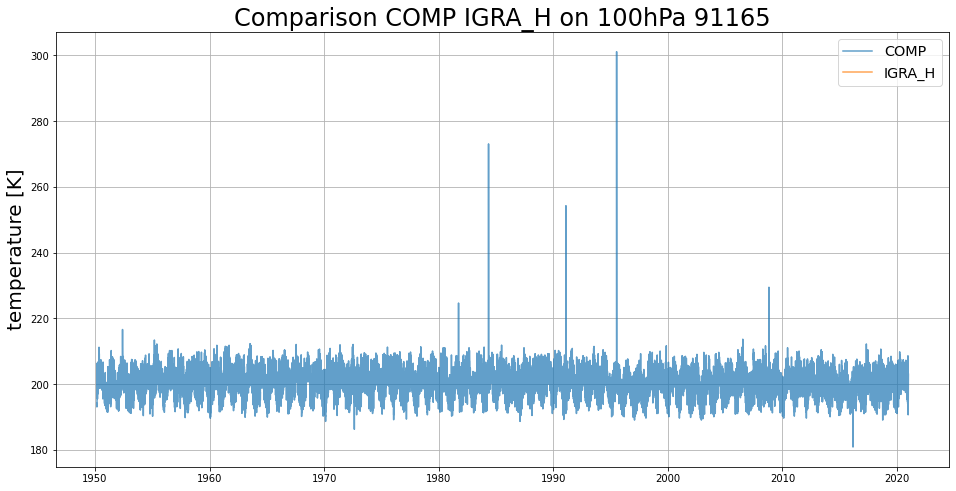

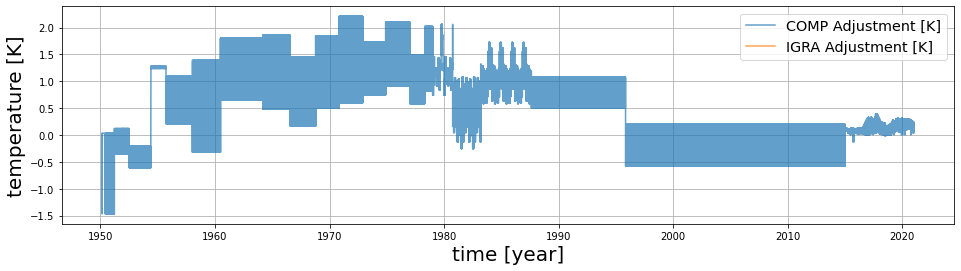

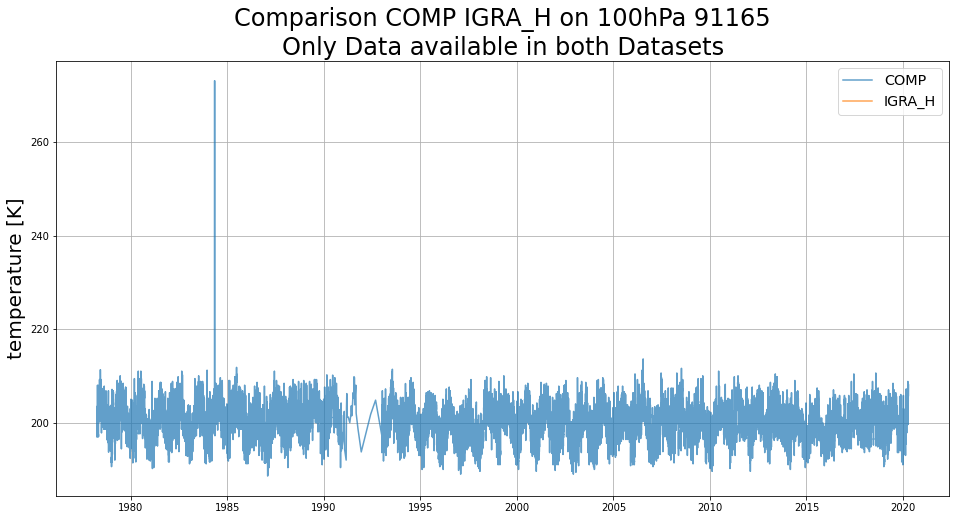

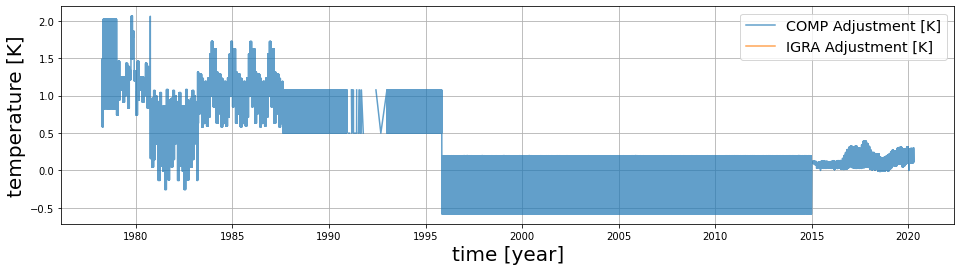

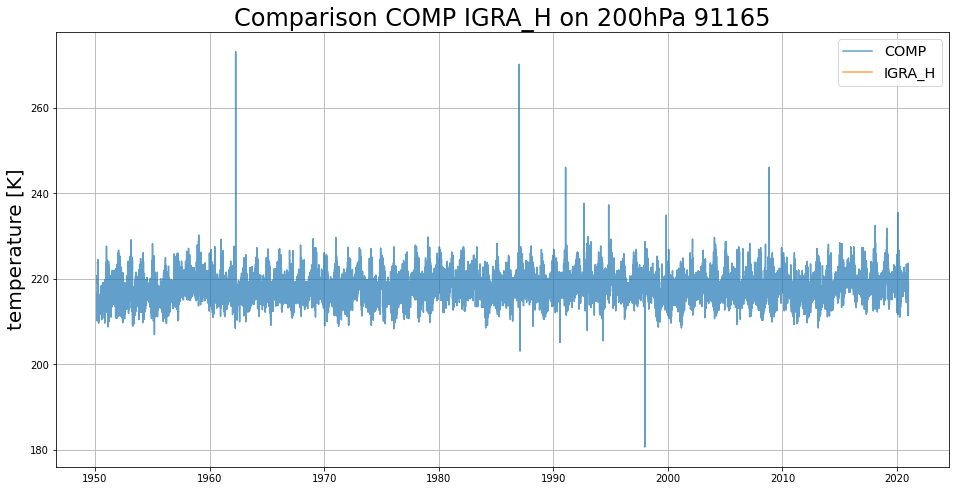

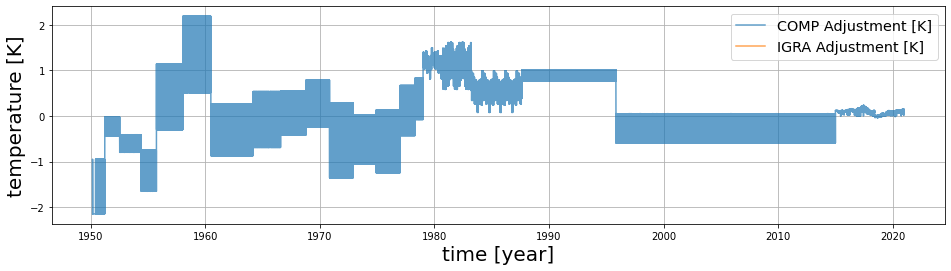

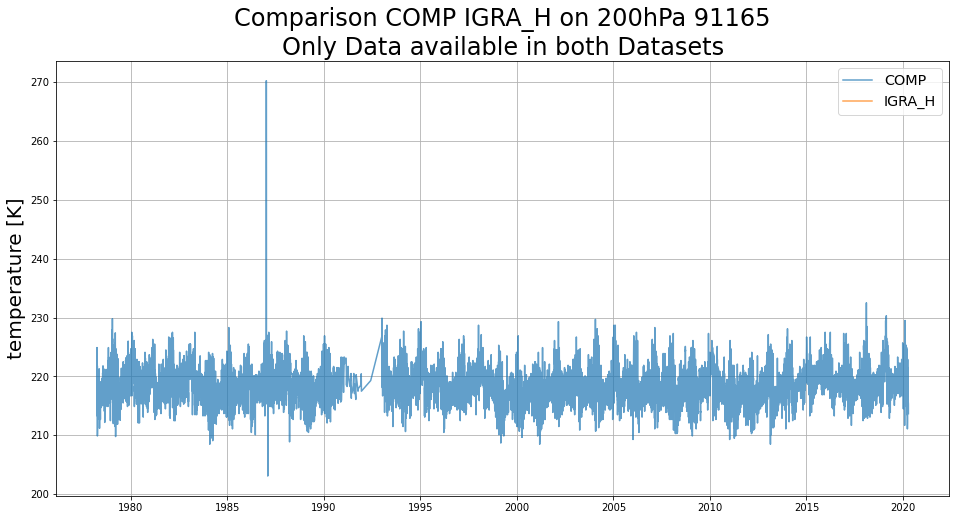

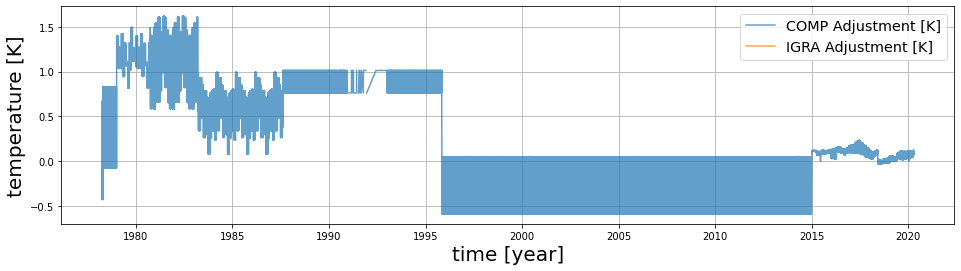

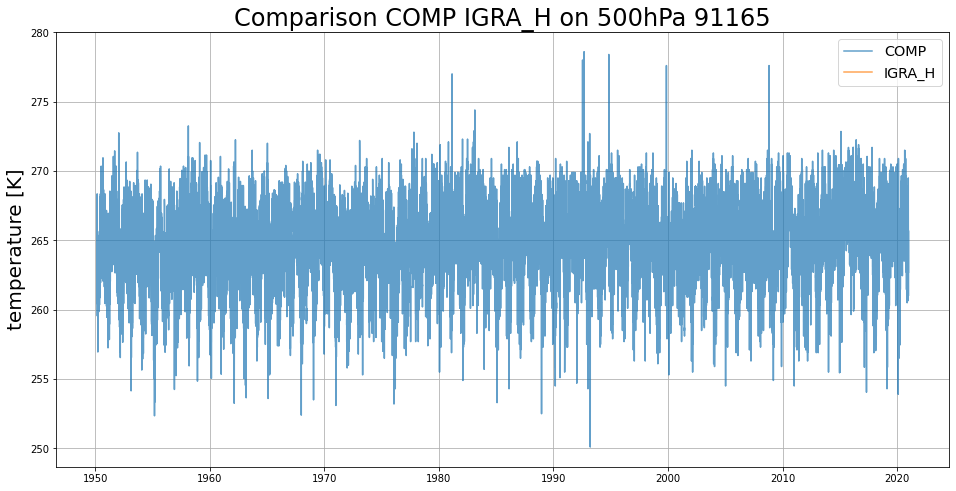

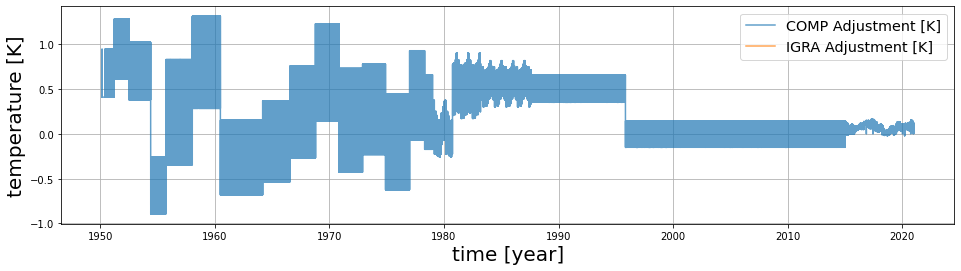

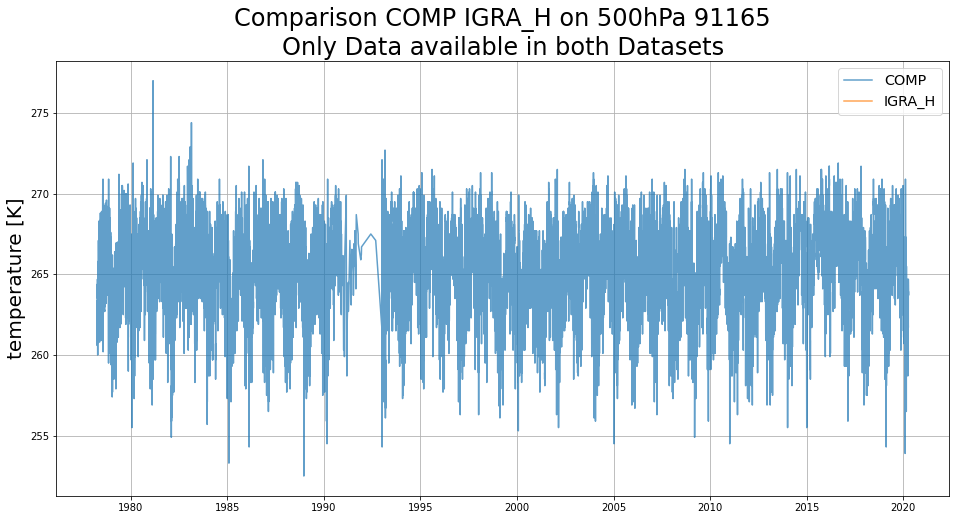

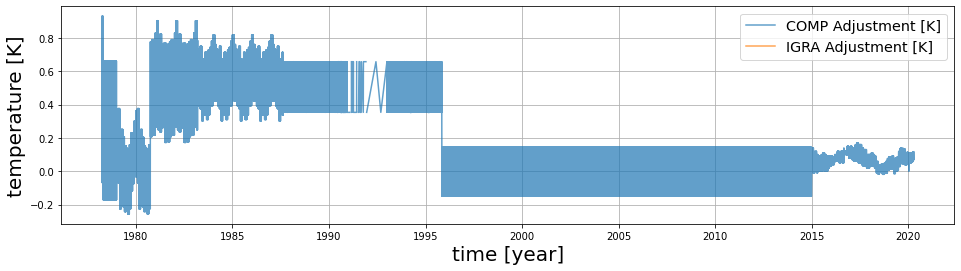

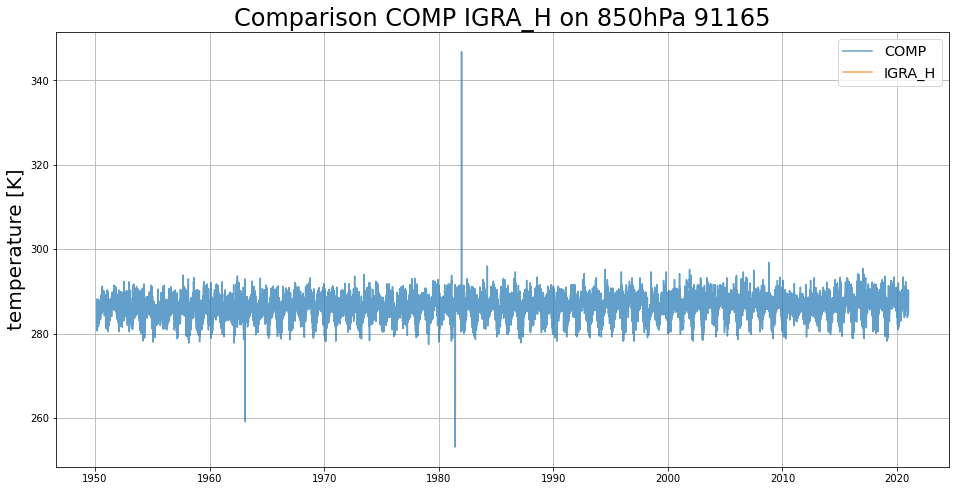

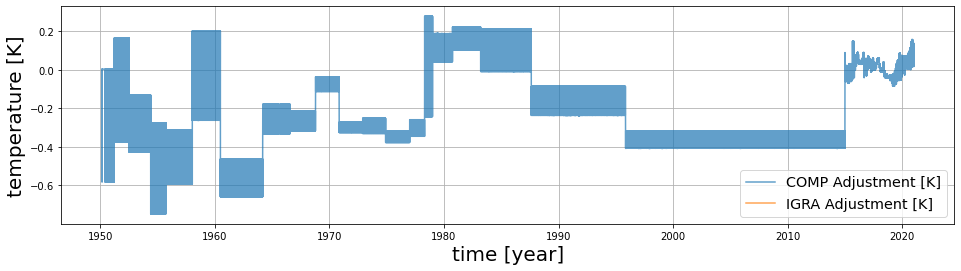

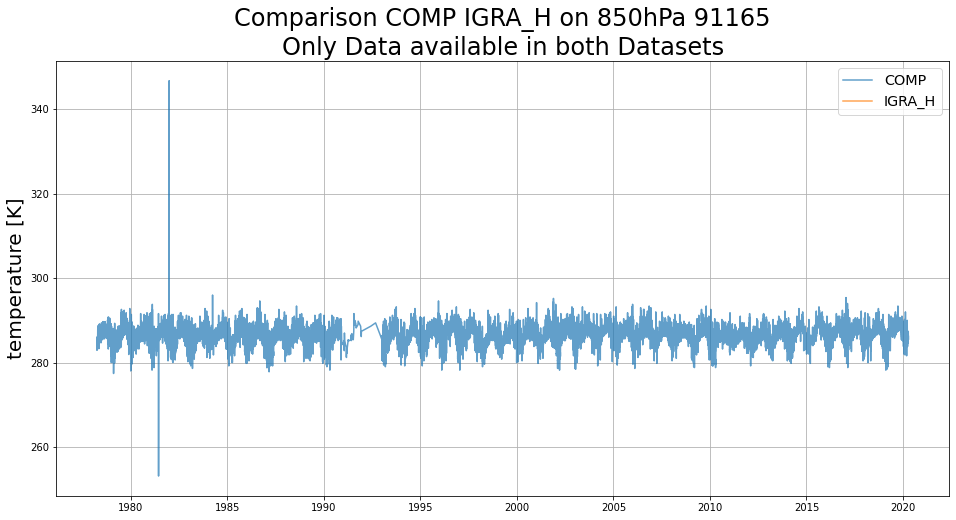

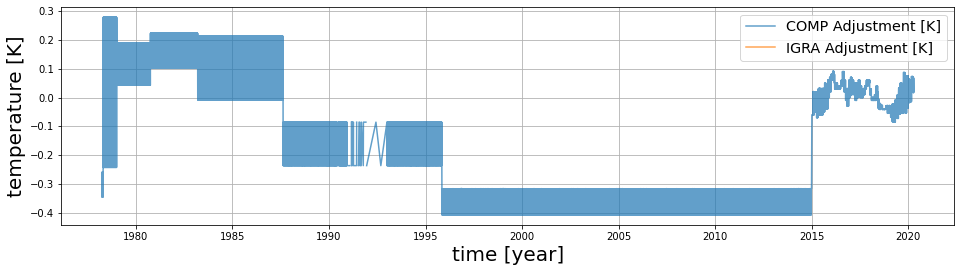

In [36]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_original[i]
    b = igrah_original[i]
    c = comp_original[i]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(b.report_timestamp, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc)
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(c.time, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(b.report_timestamp, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    
    a = igra_adjusted[i]
    b = igra_h_adjusted[i]
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.bias_estimate), label = 'COMP Adjustment [K]', alpha=0.7)
    ax1.plot(xax, (np.asarray(a.air_temperature)-np.asarray(b.air_temperature)), label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

## Trends:

Before we adjust the data sets any further, we have a look at the trends. <br>


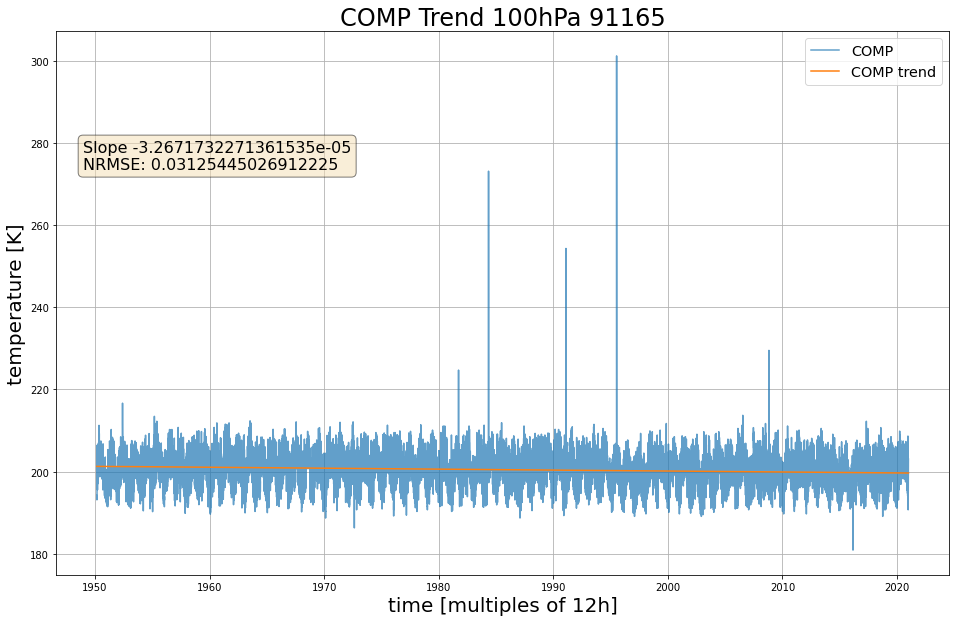

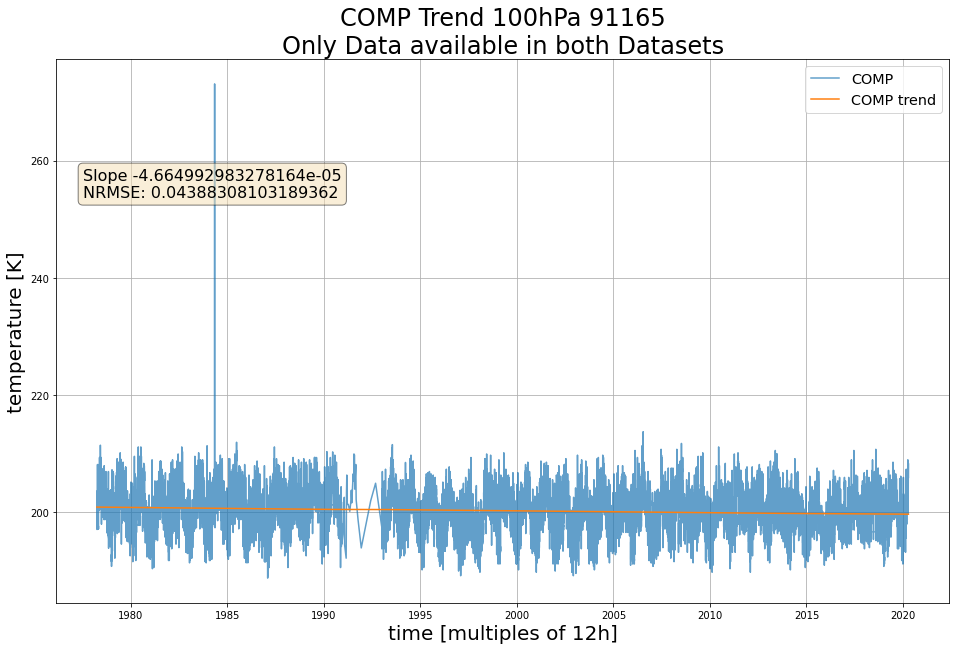

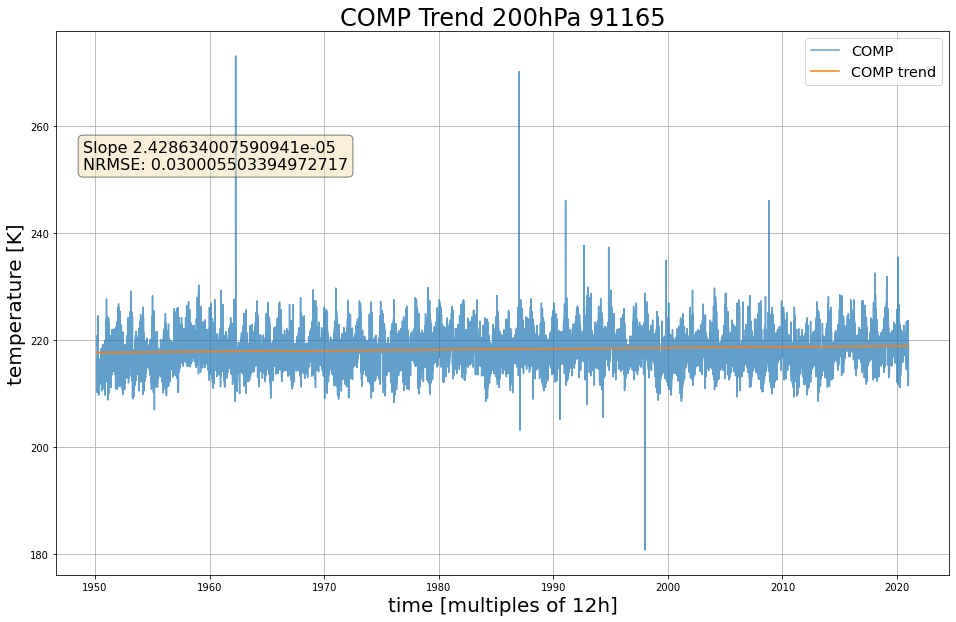

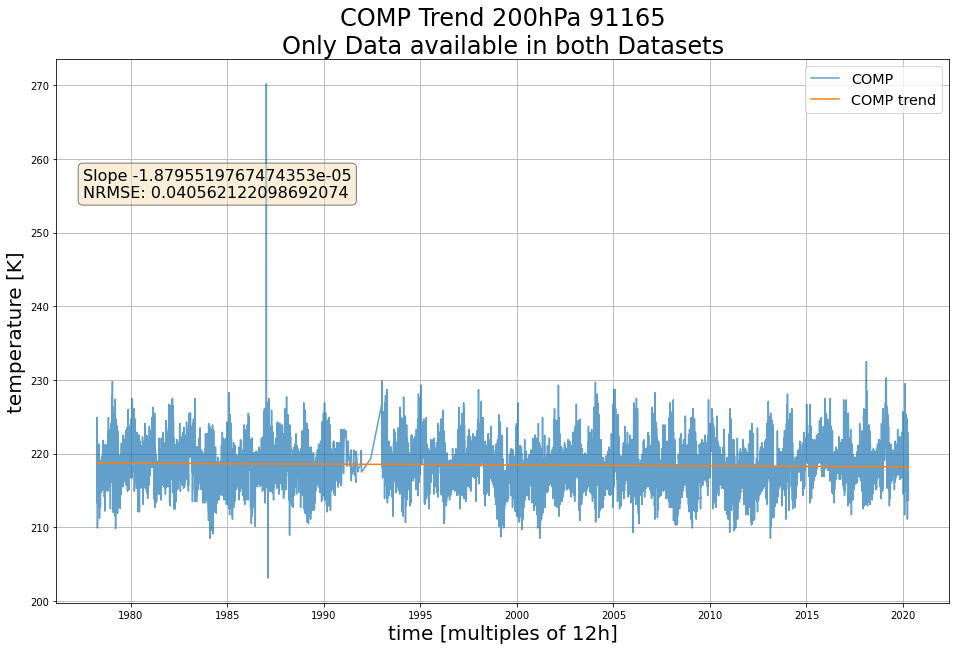

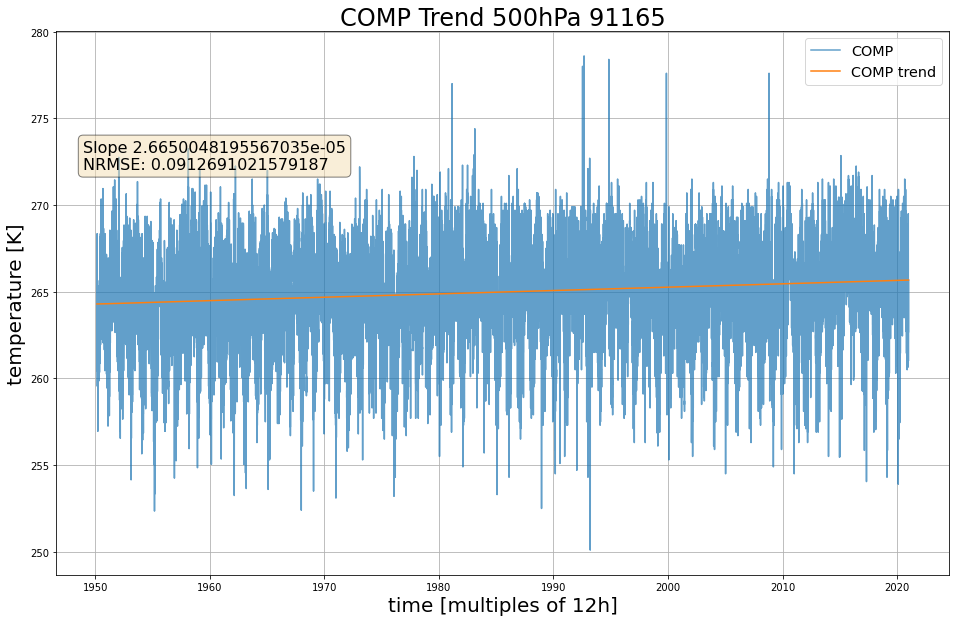

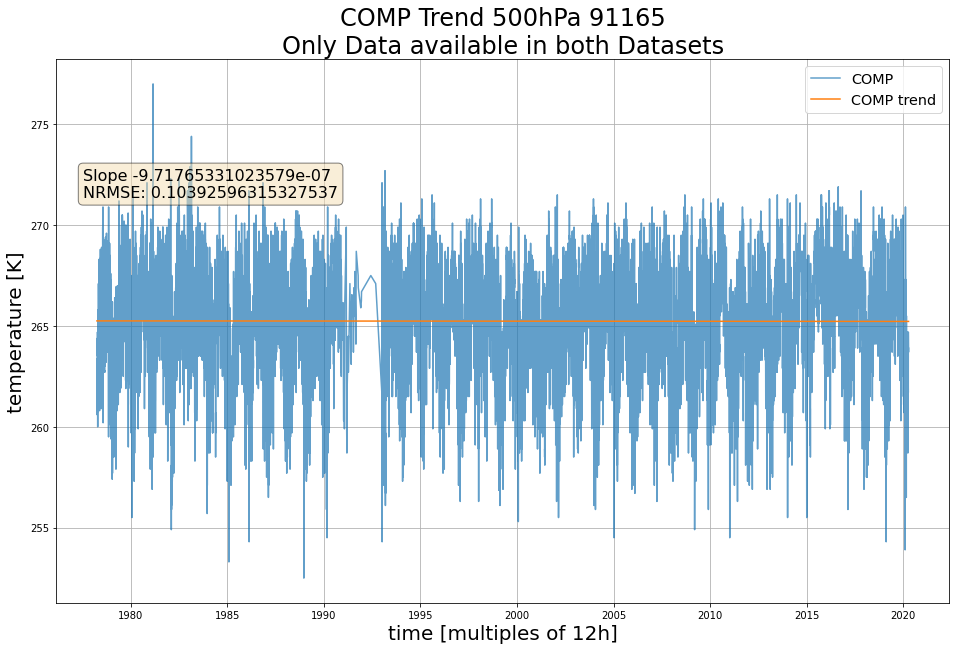

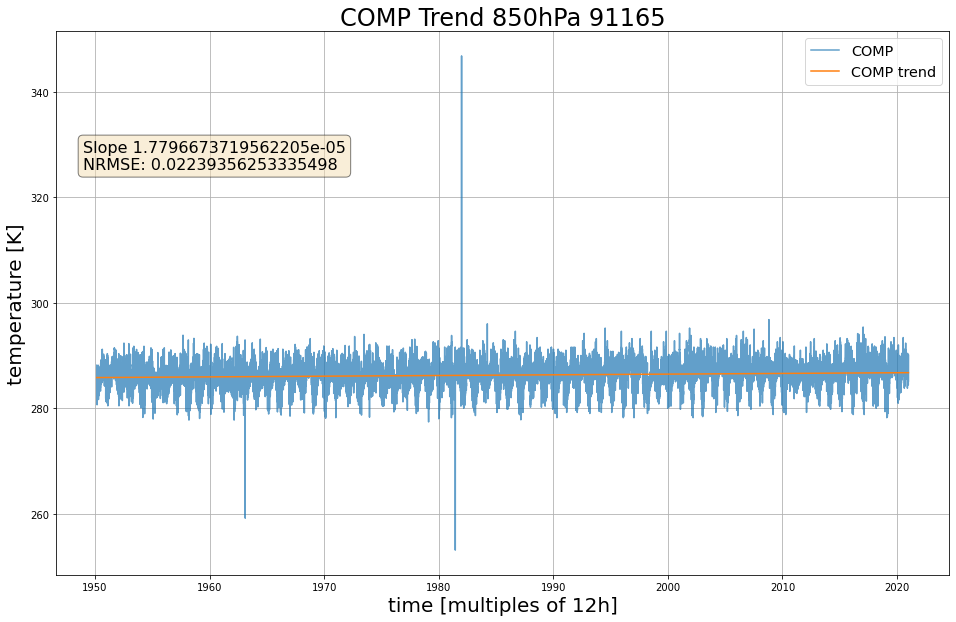

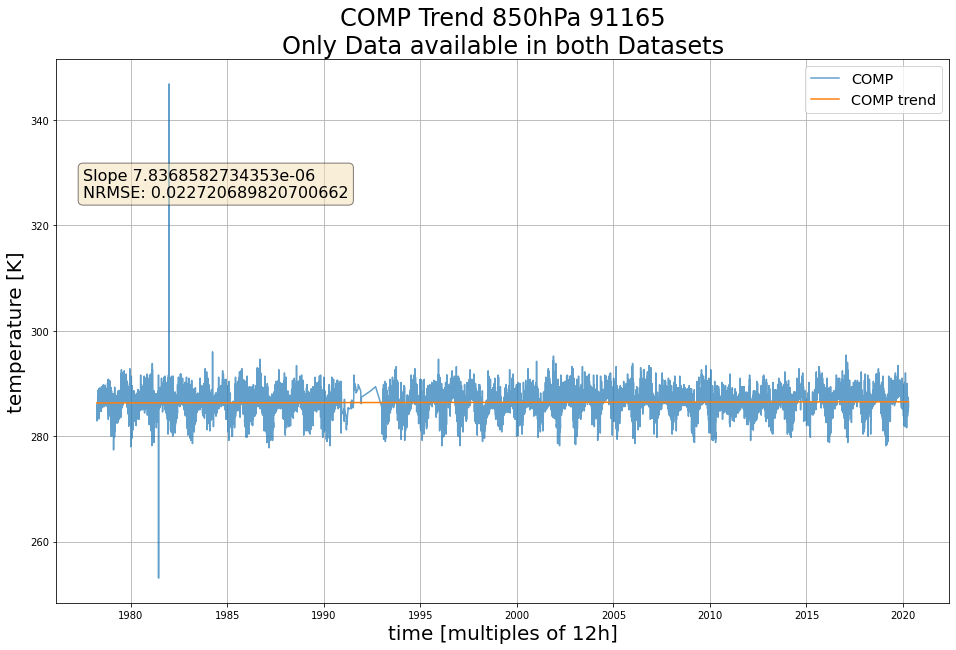

In [37]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = comp_original[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    selected = c.ta
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'COMP', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'COMP trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='COMP Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

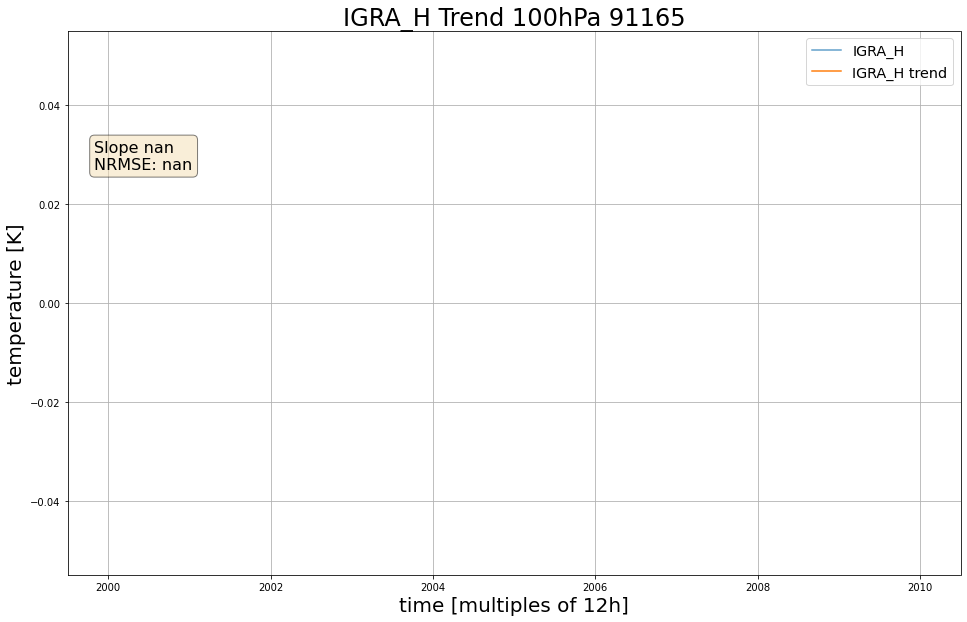

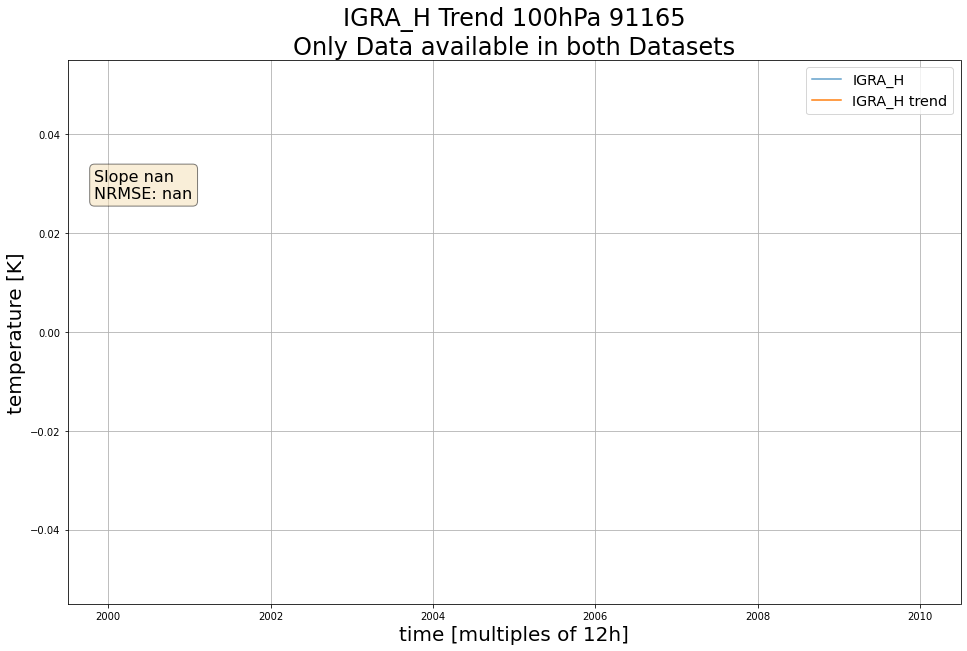

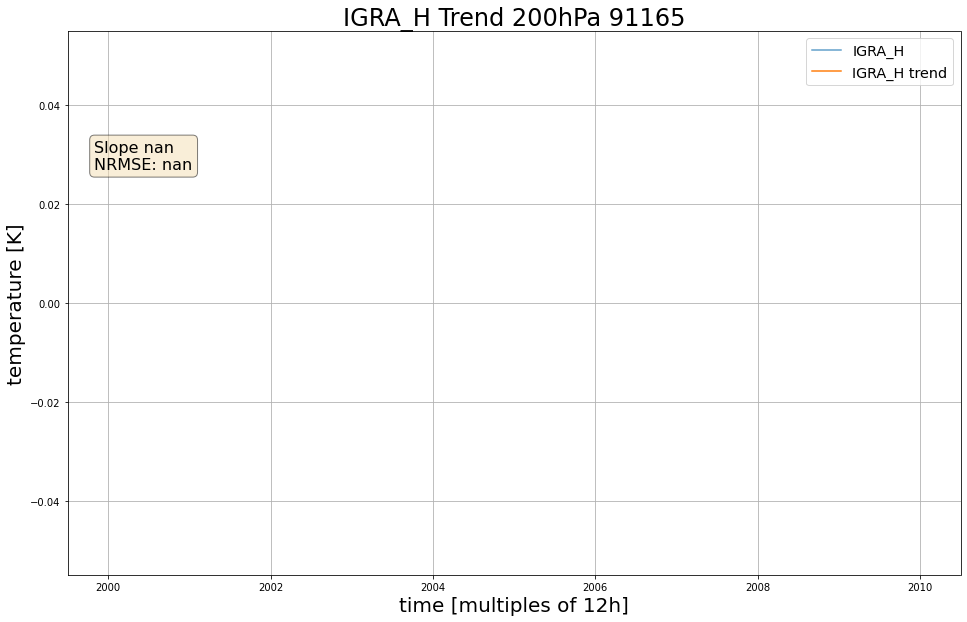

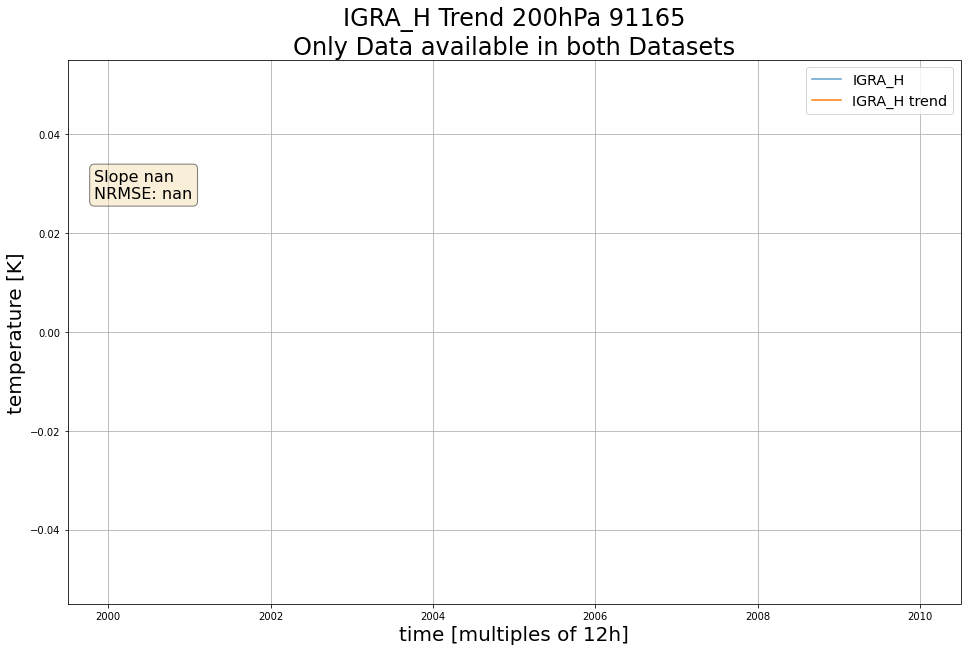

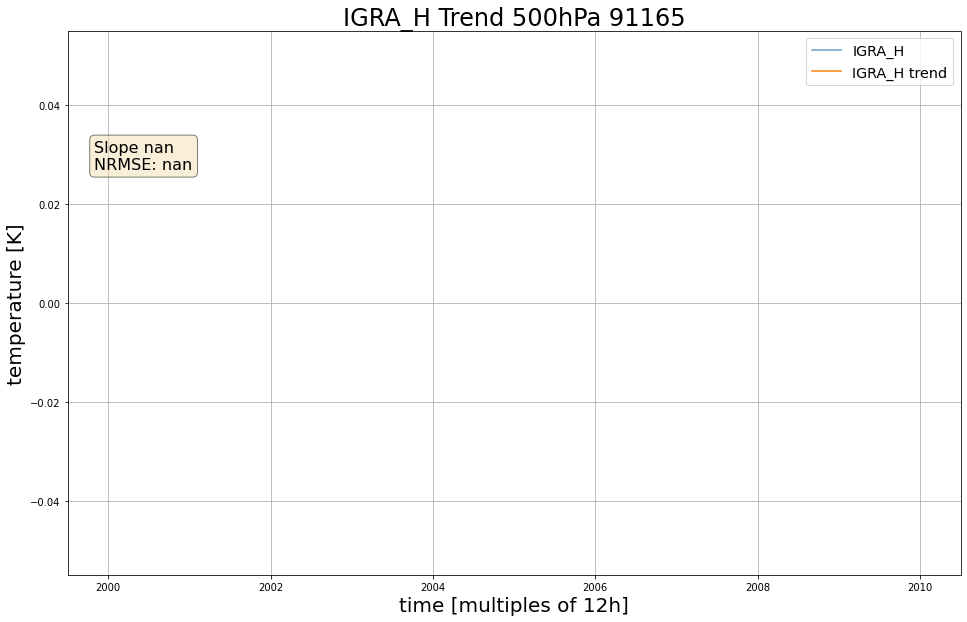

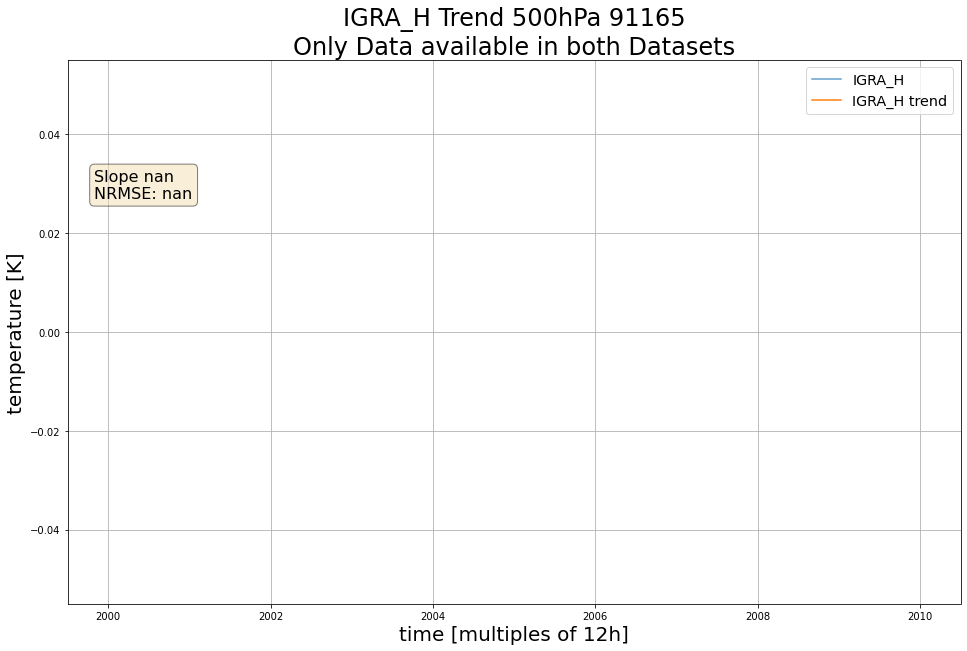

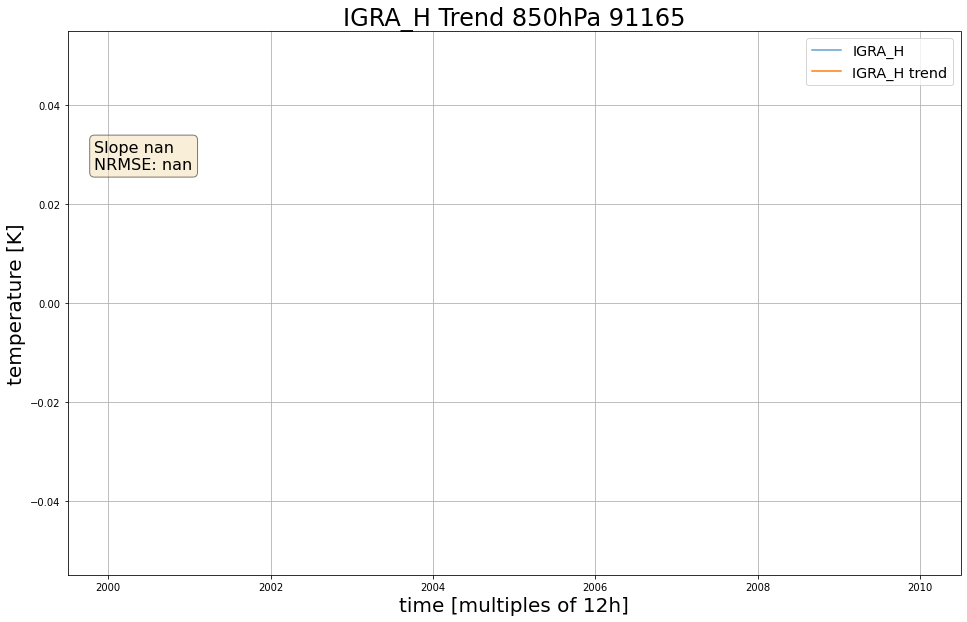

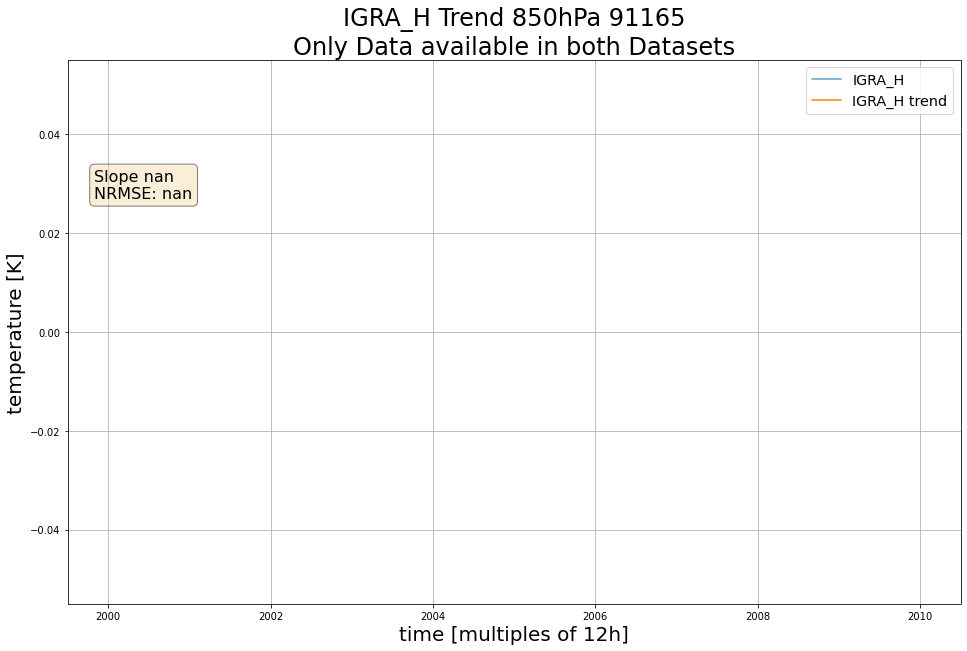

In [38]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    c = igrah_original[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc)
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    c = comp_adjusted[i]
    xax = np.asarray(c.time)
    
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    
    c = igra_h_adjusted[i]
    xax = np.asarray(c.report_timestamp)
    selected = c.air_temperature
    datlen = len(selected)
    coefficients, residuals, _, _, _ = np.polyfit(range(datlen),selected,1,full=True)
    mse = residuals[0]/(datlen)
    nrmse = np.sqrt(mse)/(selected.max() - selected.min())

    fig, (ax1) = plt.subplots(1, 1)
    ax1.plot(xax, np.asarray(selected), label = 'IGRA_H', alpha=0.7)
    ax1.plot(xax, [coefficients[0]*x + coefficients[1] for x in range(len(selected))], label = 'IGRA_H trend')
    ax1.set(xlabel ='time [multiples of 12h]', ylabel='temperature [K]', title='IGRA_H Trend '+str(preslist[i])+'hPa '+loc+'\n'+'Only Data available in both Datasets')
    textstr = 'Slope ' + str(coefficients[0]) +'\n'+'NRMSE: ' + str(nrmse)
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
    ax1.text(0.03, 0.8, textstr, transform=ax1.transAxes, fontsize=16, verticalalignment='top', bbox=props)


    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)
    

## Moving Average

We remove the monthly variation, by creating a moving average over 14 days and subtracting it from the original data. <br>
Every data set is treated the same way, so they stay comparable.

In [39]:
# reduced data
#
comp_ma = []
igra_h_ma = []
igra_ma = []

for i in range(len(comp_adjusted)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_adjusted[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_ma.append(comp_adjusted[i])
    comp_ma[i].ta = comp_ma[i].ta - rm
    
    datain = np.asarray(igra_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_ma.append(igra_adjusted[i])
    igra_ma[i].air_temperature = igra_ma[i].air_temperature - rm
    
    datain = np.asarray(igra_h_adjusted[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_h_ma.append(igra_h_adjusted[i])
    igra_h_ma[i].air_temperature = igra_h_ma[i].air_temperature - rm

In [40]:
# original data
#
comp_o_ma = []
igrah_o_ma = []
igra_o_ma = []

for i in range(len(comp_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(comp_original[i].ta)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    comp_o_ma.append(comp_original[i])
    comp_o_ma[i].ta = comp_o_ma[i].ta - rm

    
for i in range(len(igra_original)):
    N = 14
    S = 7
    E = 6
    
    datain = np.asarray(igra_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igra_o_ma.append(igra_original[i])
    igra_o_ma[i].air_temperature = igra_o_ma[i].air_temperature - rm
    
    datain = np.asarray(igrah_original[i].air_temperature)
    rm = np.convolve(datain, np.ones((N,))/N, mode='valid')
    start = np.array([rm[0]]*S)
    end = np.array([rm[-1]]*E)
    rm = np.concatenate((start, rm))
    rm = np.concatenate((rm, end))
    igrah_o_ma.append(igrah_original[i])
    igrah_o_ma[i].air_temperature = igrah_o_ma[i].air_temperature - rm

## Day and Night Data:

We split the data sets into a day ascent and night ascent part. <br>

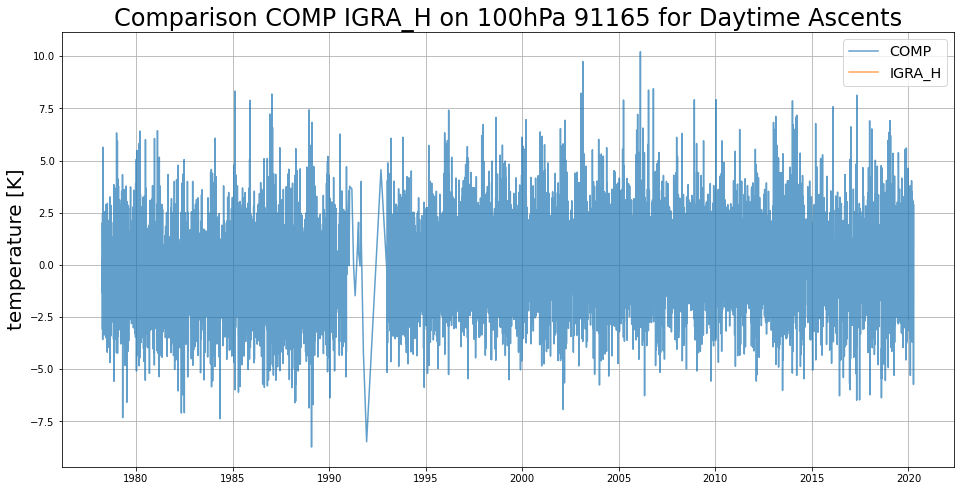

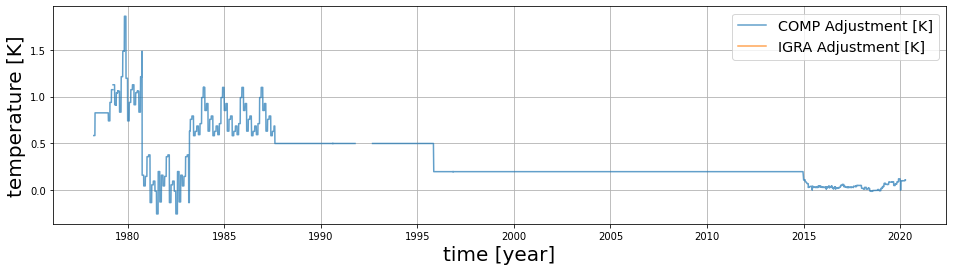

COMP Adjustment MEAN: 0.34314895
COMP Adjustment MIN: -0.25427184
COMP Adjustment MAX: 1.8589818
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


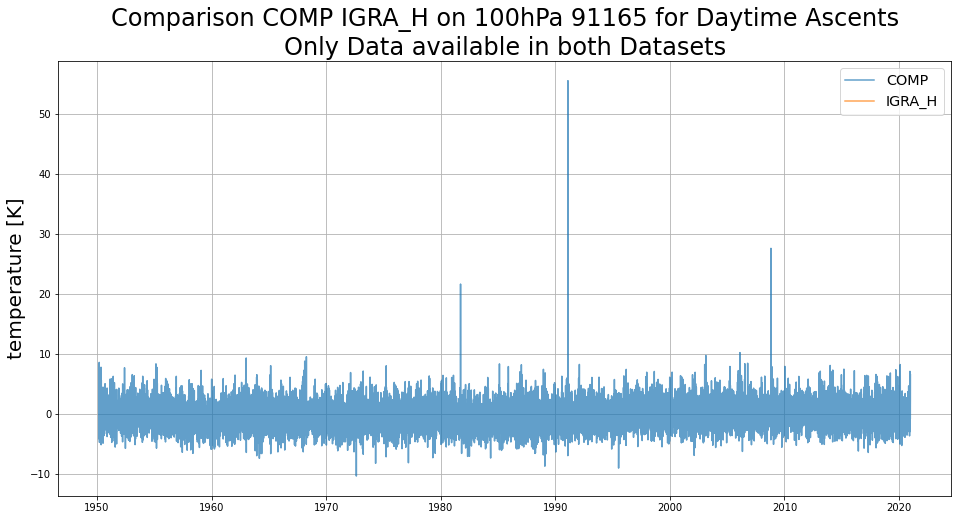

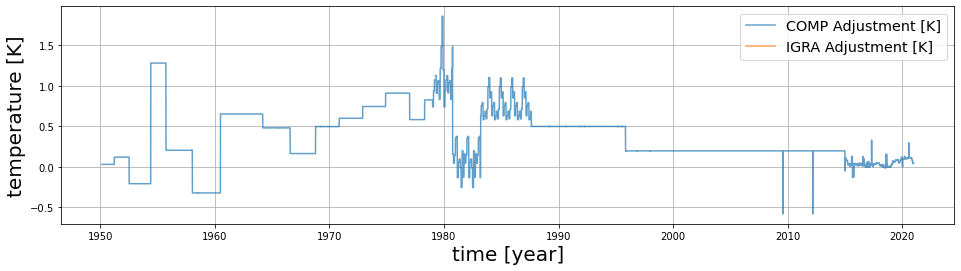

COMP Adjustment MEAN: 0.36584863
COMP Adjustment MIN: -0.58030087
COMP Adjustment MAX: 1.8589818
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


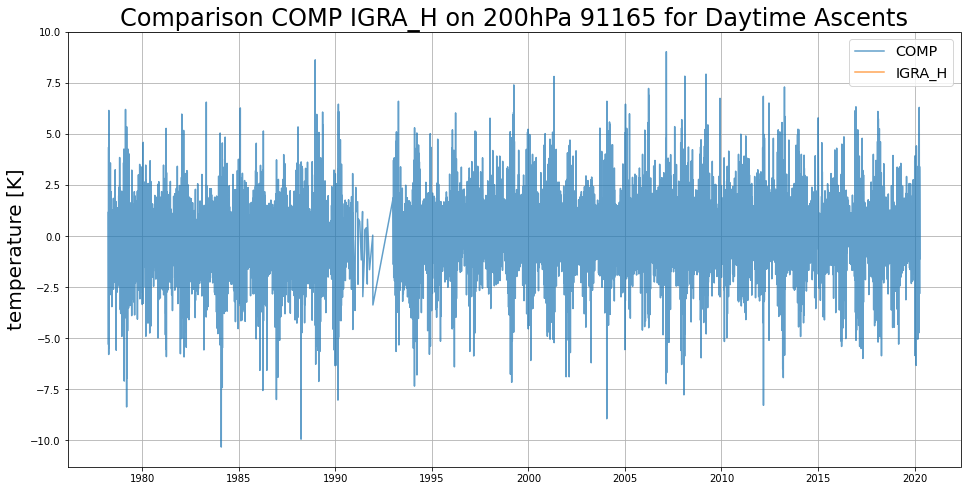

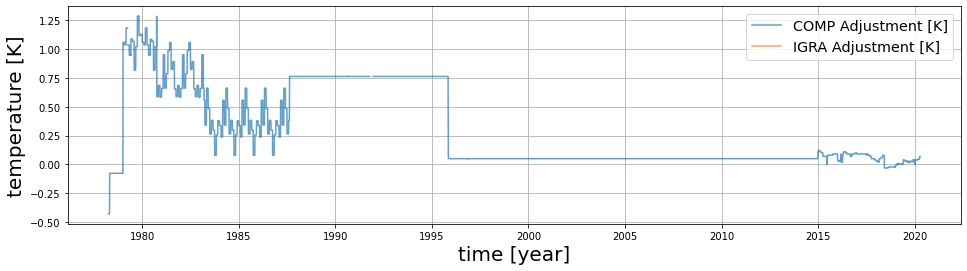

COMP Adjustment MEAN: 0.29190055
COMP Adjustment MIN: -0.42890048
COMP Adjustment MAX: 1.2835122
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


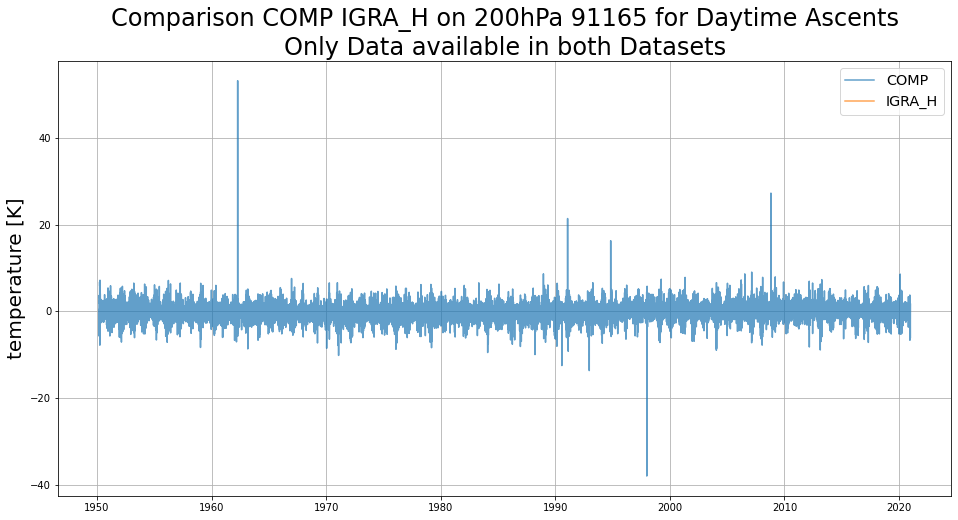

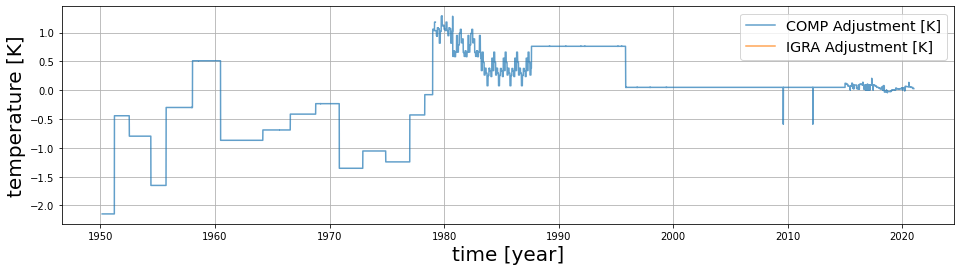

COMP Adjustment MEAN: -0.10784923
COMP Adjustment MIN: -2.1460273
COMP Adjustment MAX: 1.2835122
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


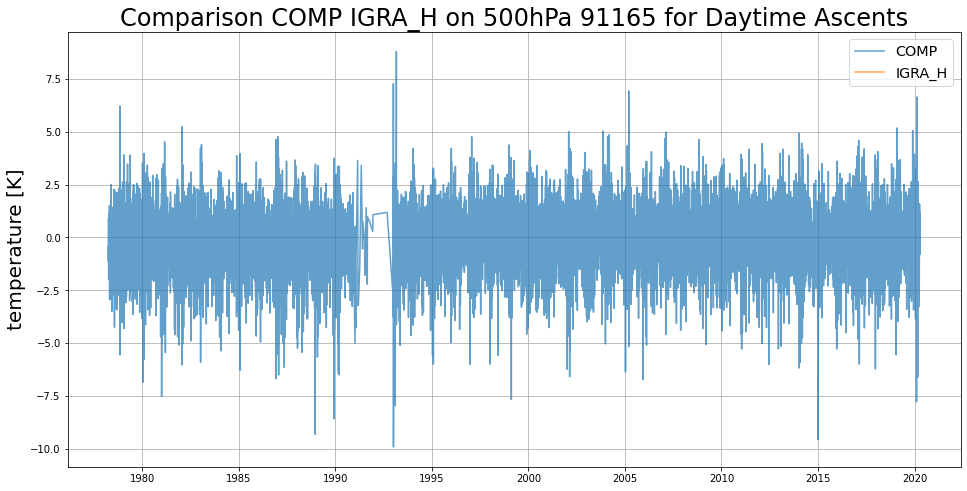

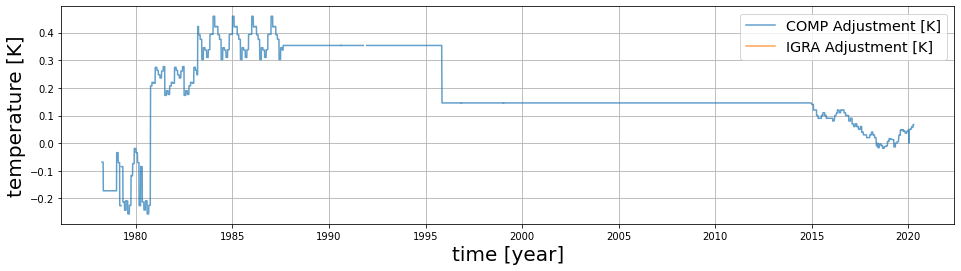

COMP Adjustment MEAN: 0.18284938
COMP Adjustment MIN: -0.2560811
COMP Adjustment MAX: 0.4591519
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


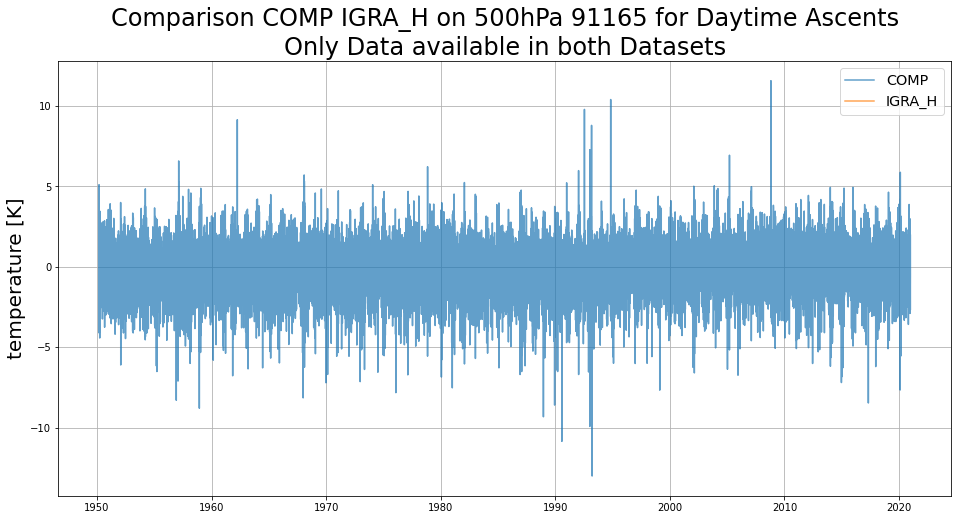

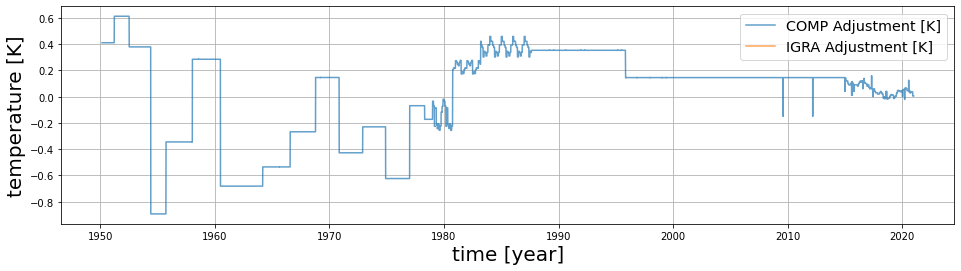

COMP Adjustment MEAN: 0.017815765
COMP Adjustment MIN: -0.89330554
COMP Adjustment MAX: 0.6129349
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


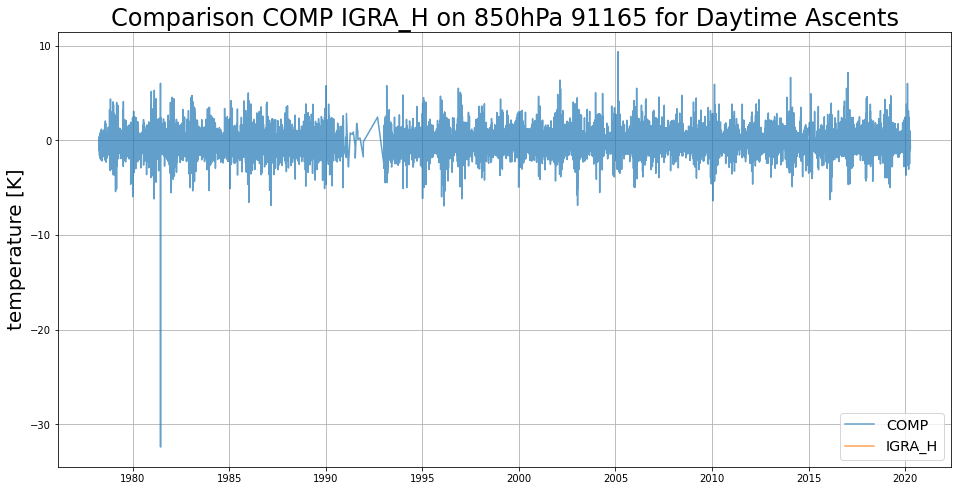

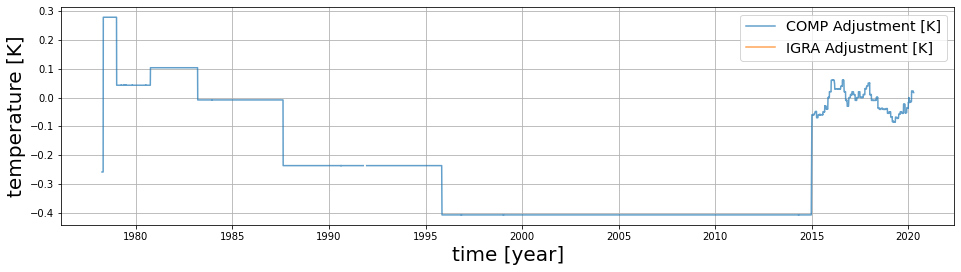

COMP Adjustment MEAN: -0.22993486
COMP Adjustment MIN: -0.40754074
COMP Adjustment MAX: 0.27866092
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


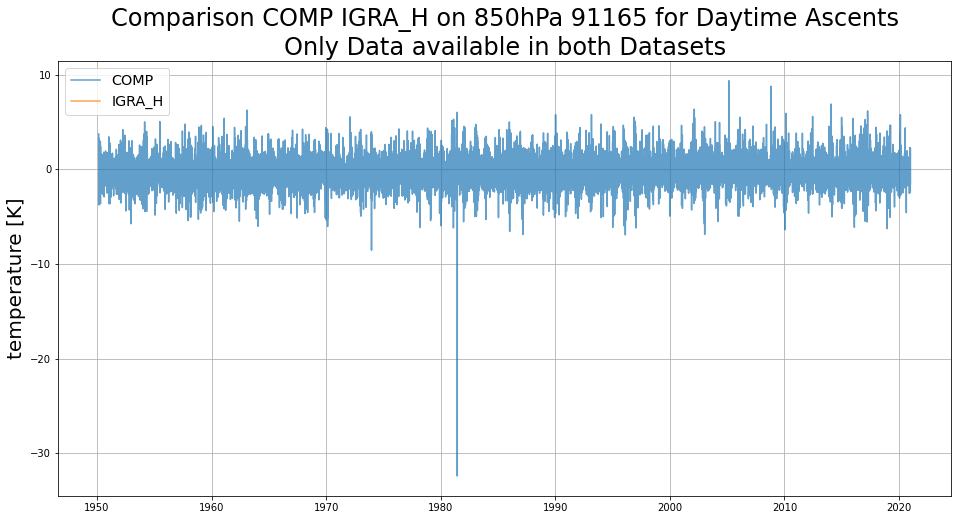

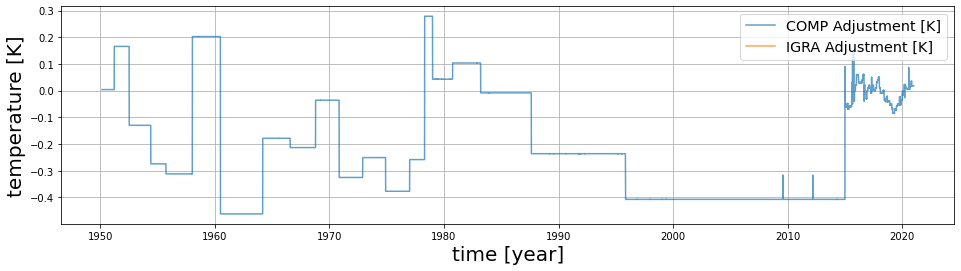

COMP Adjustment MEAN: -0.21252514
COMP Adjustment MIN: -0.4620935
COMP Adjustment MAX: 0.27866092
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


In [41]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour >= 6]
    a = a[a.report_timestamp.dt.hour < 18]
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour >= 6]
    b = b[b.report_timestamp.dt.hour < 18]
    c = comp_o_ma[i]
    c = c[c.time.dt.hour >= 6]
    c = c[c.time.dt.hour < 18]
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

In [42]:
a = igra_o_ma[0]
a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour > 18])

station_name    report_timestamp  report_id   longitude   latitude  \
12       USM00091165 1978-04-01 00:00:00   32192032 -159.346695  21.993299   
109      USM00091165 1978-04-02 00:00:00   32192057 -159.346695  21.993299   
183      USM00091165 1978-04-03 00:00:00   32192082 -159.346695  21.993299   
268      USM00091165 1978-04-04 00:00:00   32192104 -159.346695  21.993299   
349      USM00091165 1978-04-05 00:00:00   32192124 -159.346695  21.993299   
...              ...                 ...        ...         ...        ...   
1530269  USM00091165 2002-03-03 23:00:00   32200229 -159.346695  21.993299   
1676114  USM00091165 2003-04-25 23:00:00   32206759 -159.346695  21.993299   
2299496  USM00091165 2008-03-12 23:00:00   32205917 -159.346695  21.993299   
2322080  USM00091165 2008-05-17 23:00:00   32162746 -159.346695  21.993299   
2470180  USM00091165 2009-08-05 23:00:00   32204517 -159.346695  21.993299   

         air_pressure  air_temperature             actual_time  \
12            10000.0        -0.921428  1978-04-01 00:00:00+00   
109           10000.0         0.278569  1978-04-02 00:00:00+00   
183           10000.0         2.178578  1978-04-03 00:00:00+00   
268           10000.0        -2.221431  1978-04-04 00:00:00+00   
349           10000.0         0.642857  1978-04-05 00:00:00+00   
...               ...              ...                     ...   
1530269       10000.0         2.271434  2002-03-03 22:59:00+00   
1676114       10000.0        -1.535713  2003-04-25 22:59:00+00   
2299496       10000.0        -1.028566  2008-03-12 22:58:00+00   
2322080       10000.0         0.042858  2008-05-17 22:57:00+00   
2470180       10000.0        -0.342855  2009-08-05 22:59:00+00   

         height_of_station_above_sea_level  
12                               32.299999  
109                              32.299999  
183                              32.299999  
268                              32.299999  
349                              32.299999  
...                                    ...  
1530269                          32.299999  
1676114                          32.299999  
2299496                          32.299999  
2322080                          32.299999  
2470180                          32.299999  

[14462 rows x 9 columns]

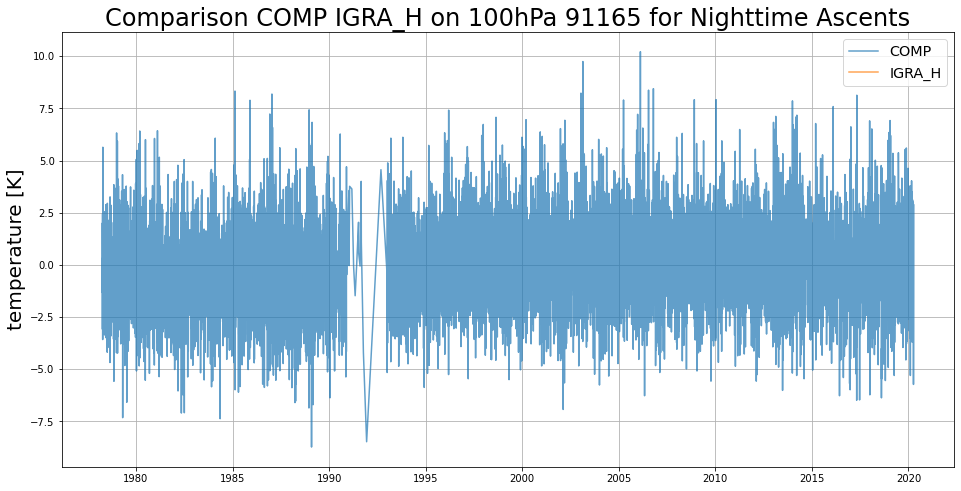

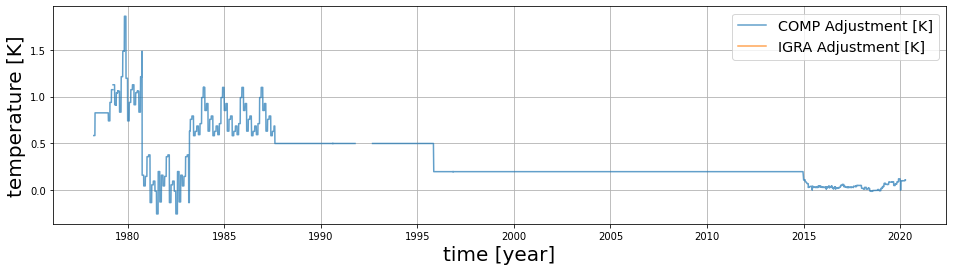

COMP Adjustment MEAN: 0.34314895
COMP Adjustment MIN: -0.25427184
COMP Adjustment MAX: 1.8589818
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


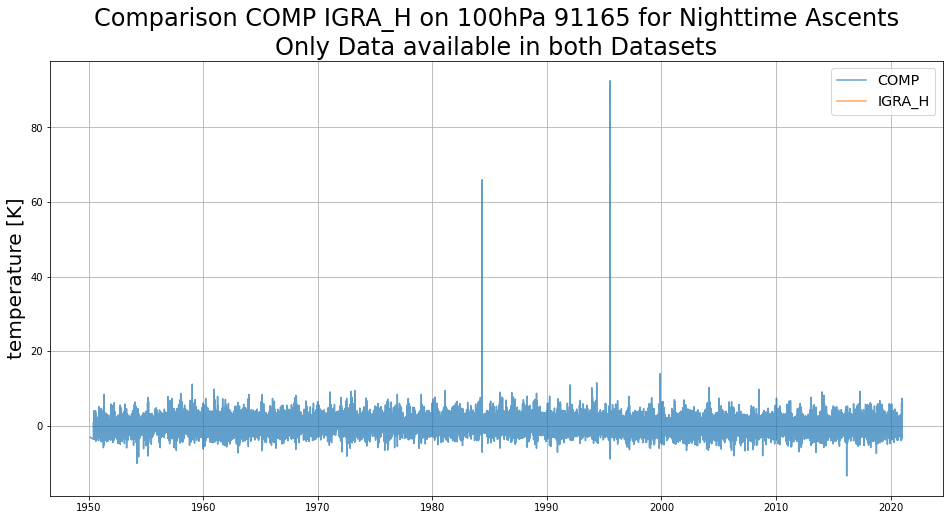

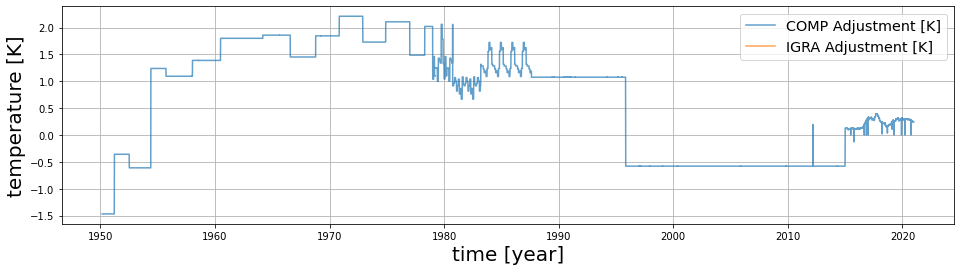

COMP Adjustment MEAN: 0.70646
COMP Adjustment MIN: -1.4694916
COMP Adjustment MAX: 2.2108366
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


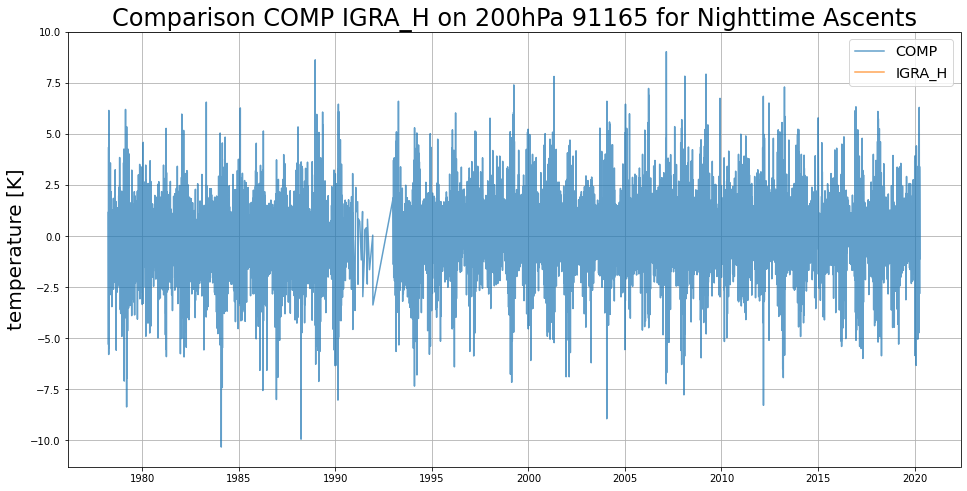

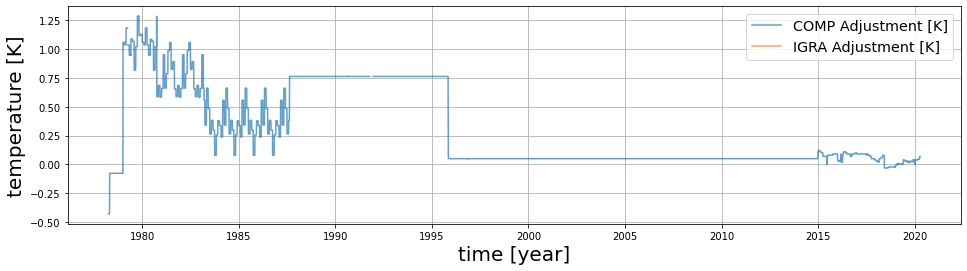

COMP Adjustment MEAN: 0.29190055
COMP Adjustment MIN: -0.42890048
COMP Adjustment MAX: 1.2835122
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


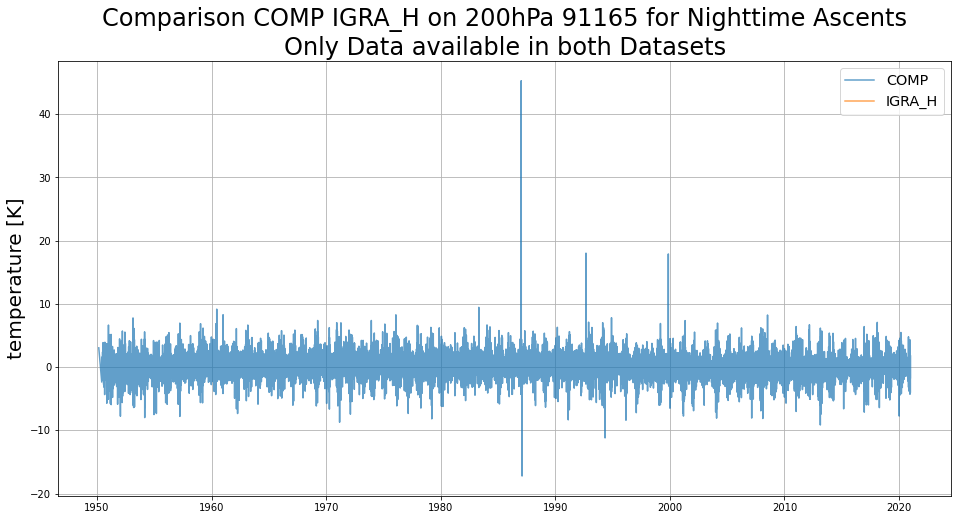

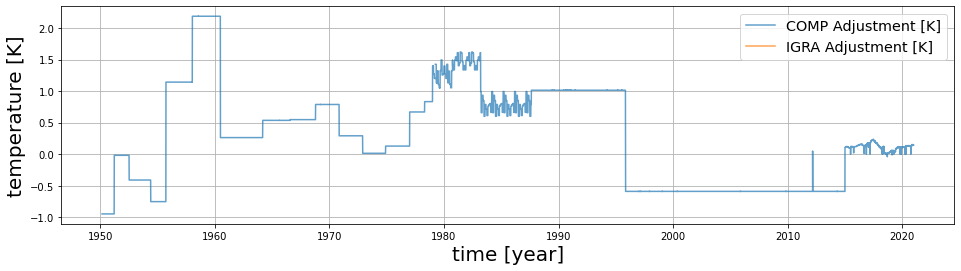

COMP Adjustment MEAN: 0.2836908
COMP Adjustment MIN: -0.946974
COMP Adjustment MAX: 2.1855845
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


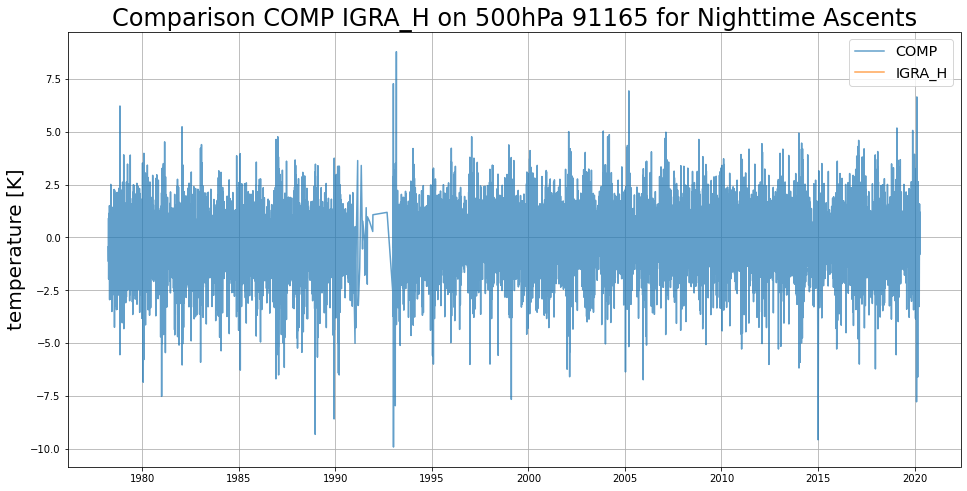

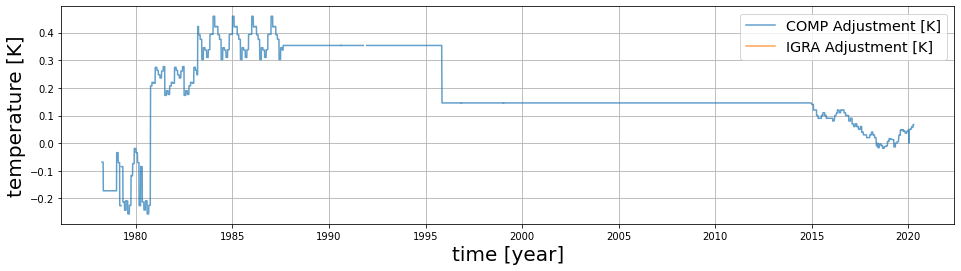

COMP Adjustment MEAN: 0.18284938
COMP Adjustment MIN: -0.2560811
COMP Adjustment MAX: 0.4591519
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


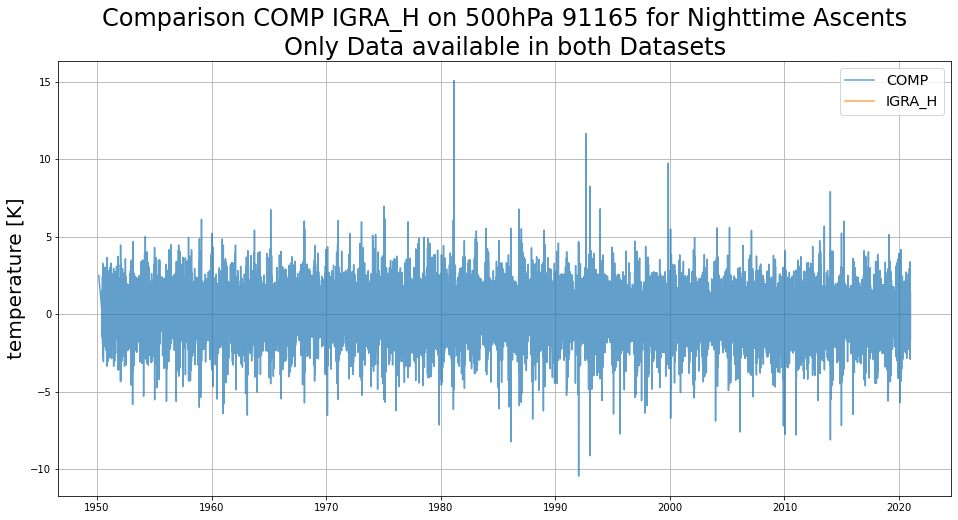

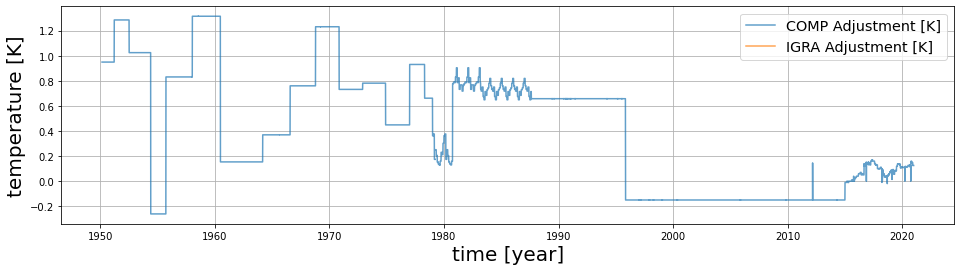

COMP Adjustment MEAN: 0.40853405
COMP Adjustment MIN: -0.26085648
COMP Adjustment MAX: 1.3145307
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


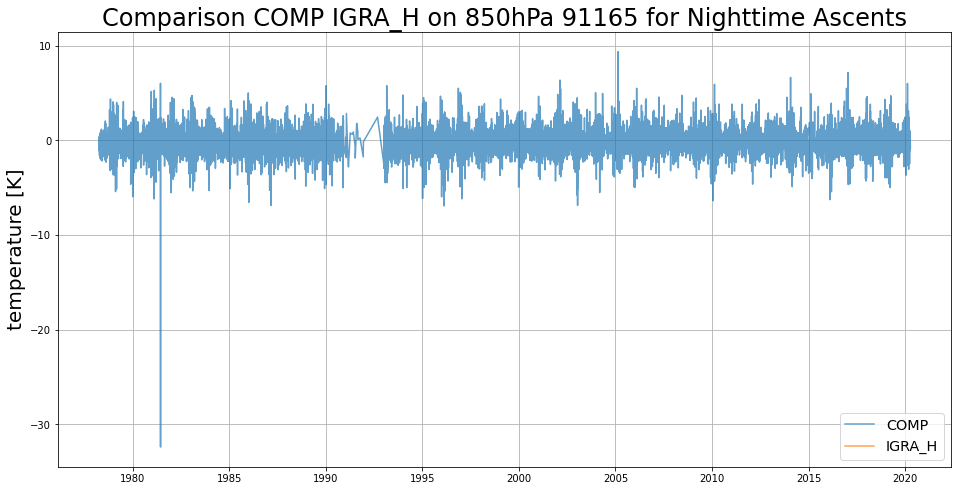

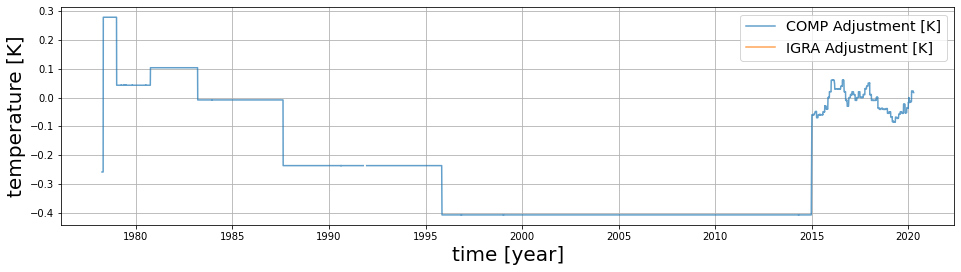

COMP Adjustment MEAN: -0.22993486
COMP Adjustment MIN: -0.40754074
COMP Adjustment MAX: 0.27866092
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


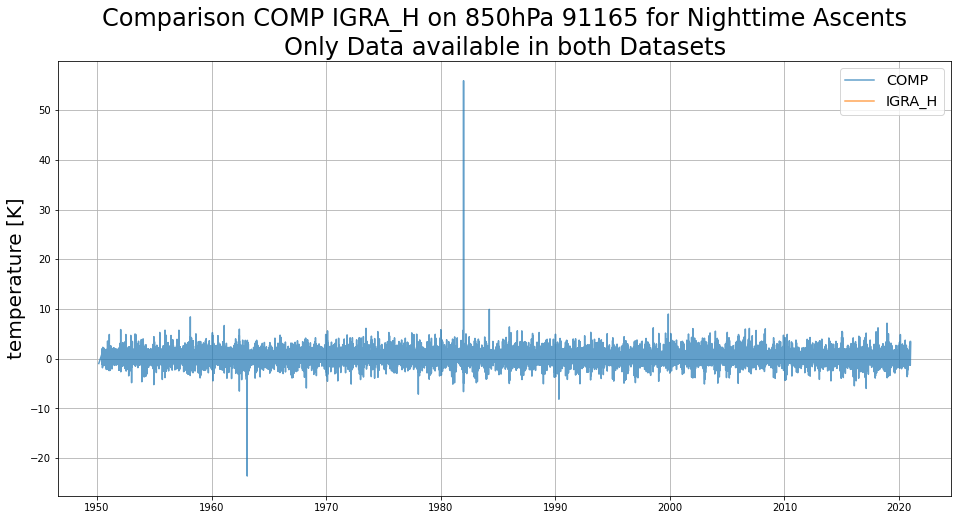

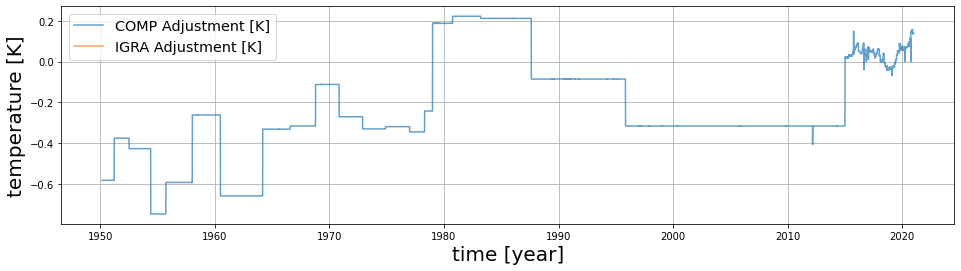

COMP Adjustment MEAN: -0.23087093
COMP Adjustment MIN: -0.7482743
COMP Adjustment MAX: 0.22313285
IGRA Adjustment MEAN: nan
IGRA Adjustment MIN: nan
IGRA Adjustment MAX: nan


In [43]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)    
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(xax, ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(xax, ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))
    
    
    a = igra_o_ma[i]
    a = a[a.report_timestamp.dt.hour < 6].append(a[a.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    b = igrah_o_ma[i]
    b = b[b.report_timestamp.dt.hour < 6].append(b[b.report_timestamp.dt.hour >= 18]).sort_values('report_timestamp')
    c = comp_o_ma[i]
    c = c[c.time.dt.hour < 6].append(c[c.time.dt.hour >= 18]).sort_values('time')
    
    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(8)
    fig.set_figwidth(16)
    ax1.plot(np.asarray(c.time), np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(np.asarray(b.report_timestamp), np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    ax1.set(ylabel='temperature [K]', title='Comparison COMP IGRA_H on '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='best')
    ax1.grid()
    plt.show()
    plt.close(fig)

    fig, (ax1) = plt.subplots(1, 1)
    fig.set_figheight(4)
    fig.set_figwidth(16)
    ca = np.asarray(c.bias_estimate)
    ax1.plot(np.asarray(c.time), ca, label = 'COMP Adjustment [K]', alpha=0.7)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    ax1.plot(np.asarray(a.report_timestamp), ia, label = 'IGRA Adjustment [K]', alpha=0.7)
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]')
    ax1.legend( loc='best')
    ax1.grid()
#     textstr = ('COMP Adjustment MEAN: ' + str(ca.mean()) + '\n' +'COMP Adjustment MIN: ' + str(ca.min()) + '\n' +'COMP Adjustment MAX: ' + str(ca.max()) + '\n' +'IGRA Adjustment MEAN: ' + str(ia.mean())+ '\n' +'IGRA Adjustment MIN: ' + str(ia.min())  + '\n' +'IGRA Adjustment MAX: ' + str(ia.max()))
#     props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)
#     ax1.text(0.03, 0.8, textstr, transform=ax.transAxes, fontsize=16, verticalalignment='top', bbox=props)
    plt.show()
    plt.close(fig)
    
    print('COMP Adjustment MEAN: ' + str(np.nanmean(ca)))
    print('COMP Adjustment MIN: ' + str(np.nanmin(ca)))
    print('COMP Adjustment MAX: ' + str(np.nanmax(ca)))
    print('IGRA Adjustment MEAN: ' + str(np.nanmean(ia)))
    print('IGRA Adjustment MIN: ' + str(np.nanmin(ia)))
    print('IGRA Adjustment MAX: ' + str(np.nanmax(ia)))

## Difference:

Finding the difference between the two data sets by subtracting them.

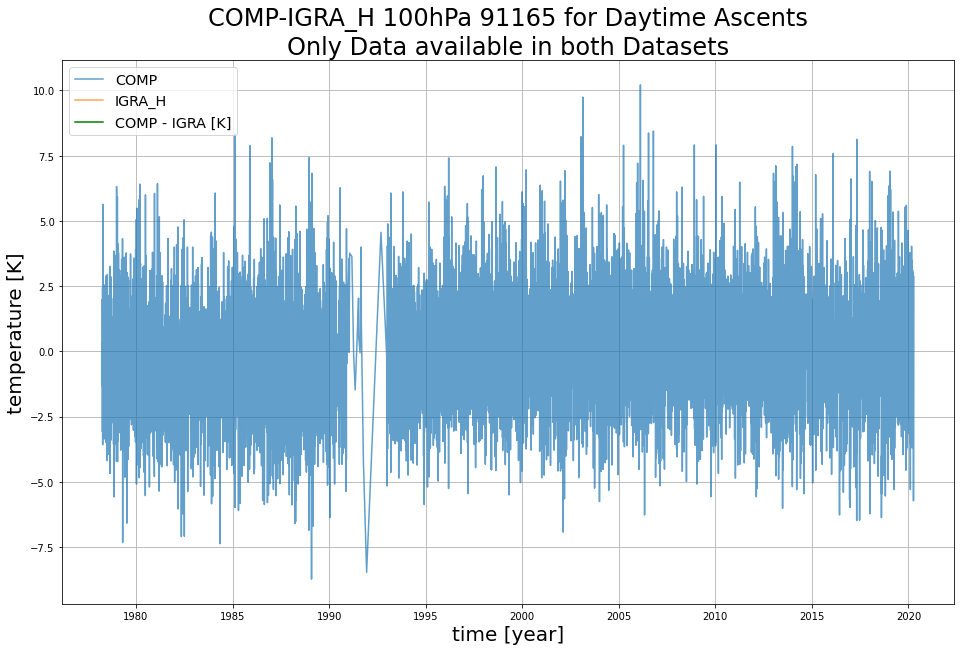

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


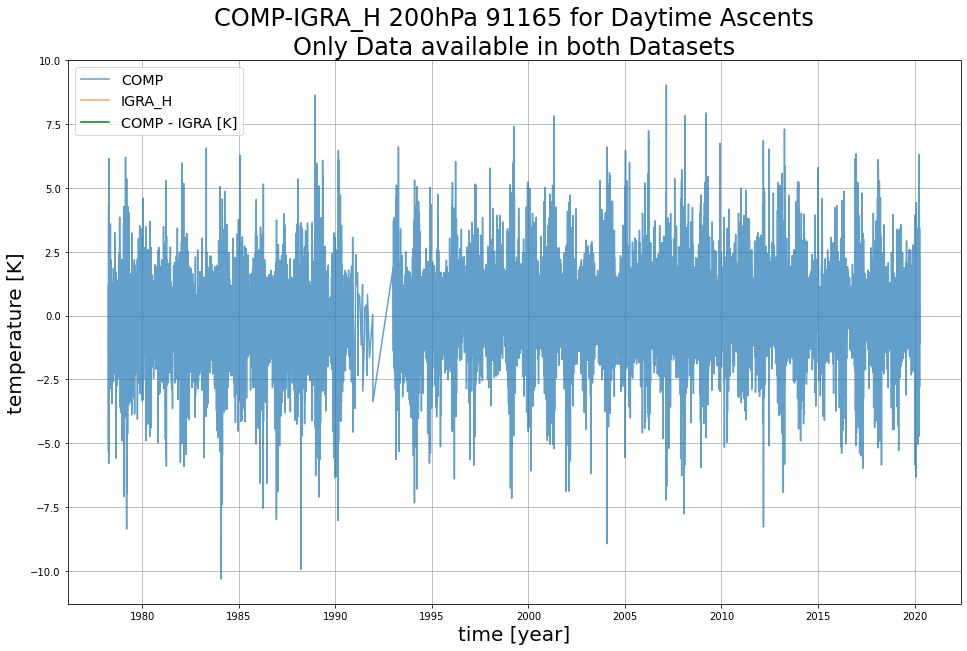

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


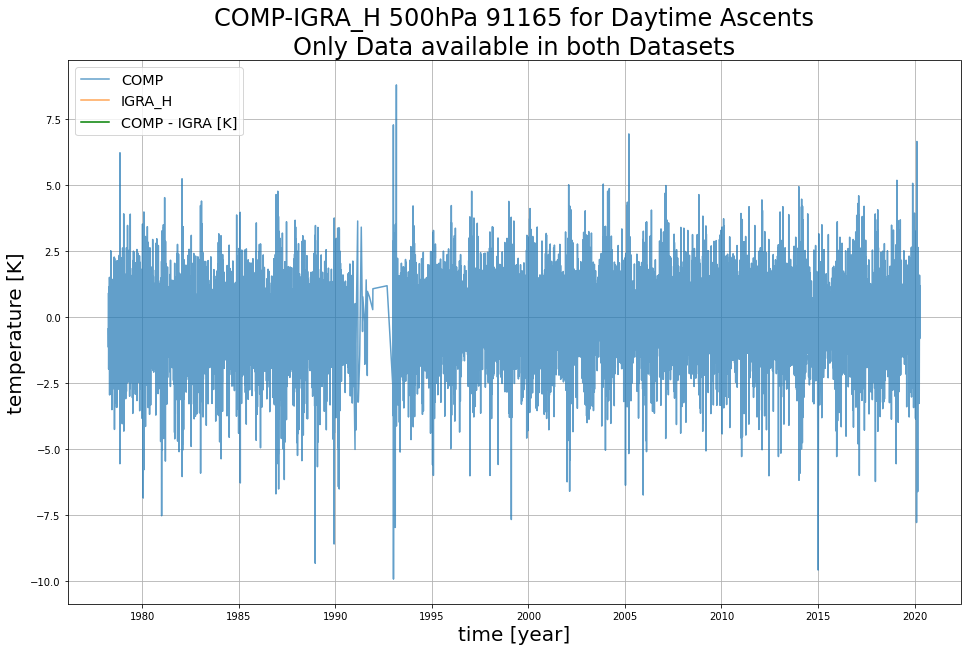

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


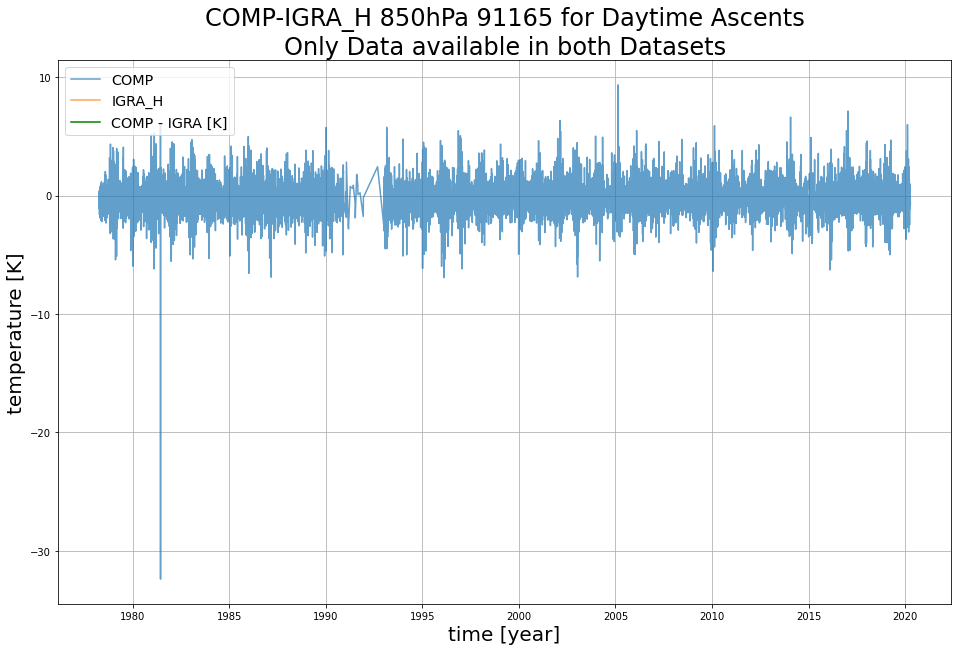

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


In [44]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Daytime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

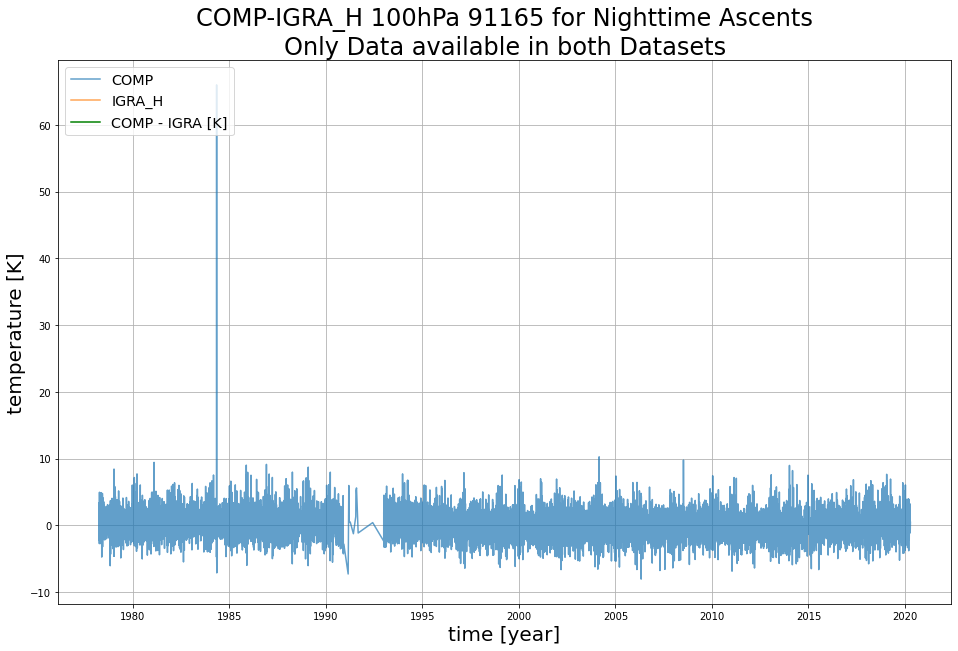

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


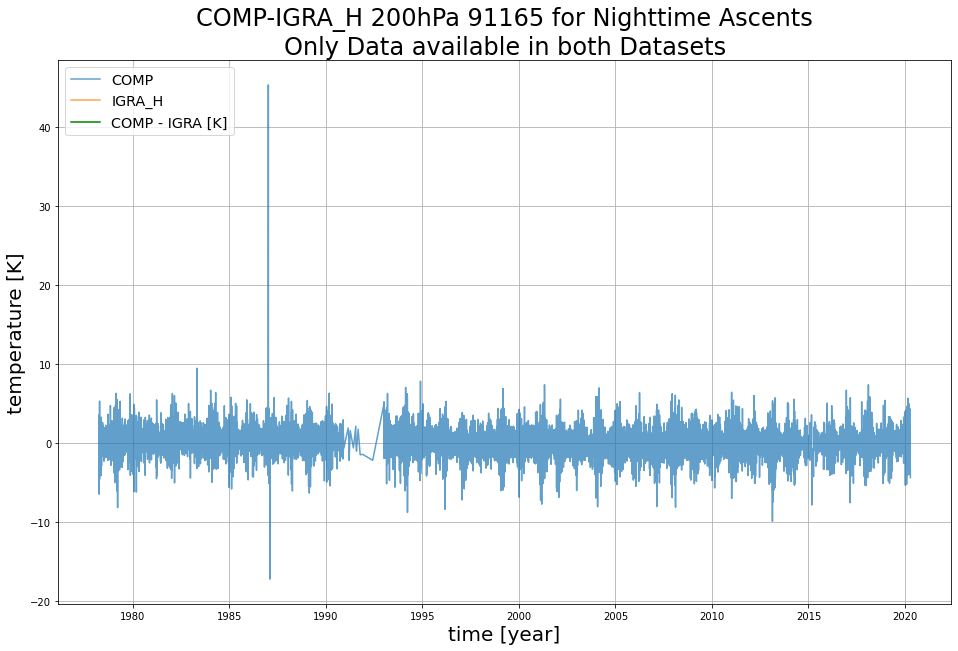

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


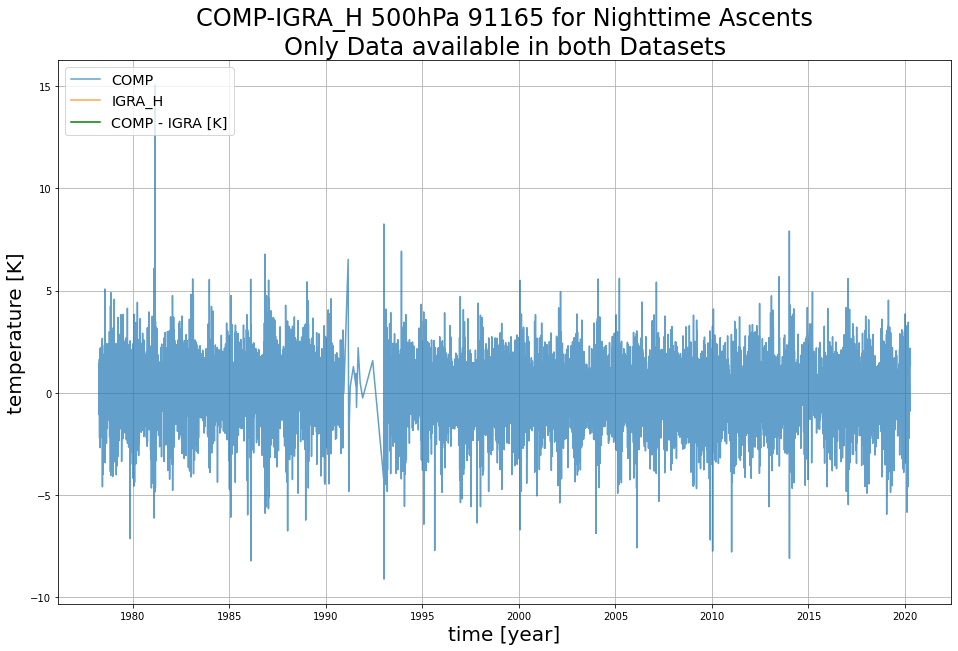

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


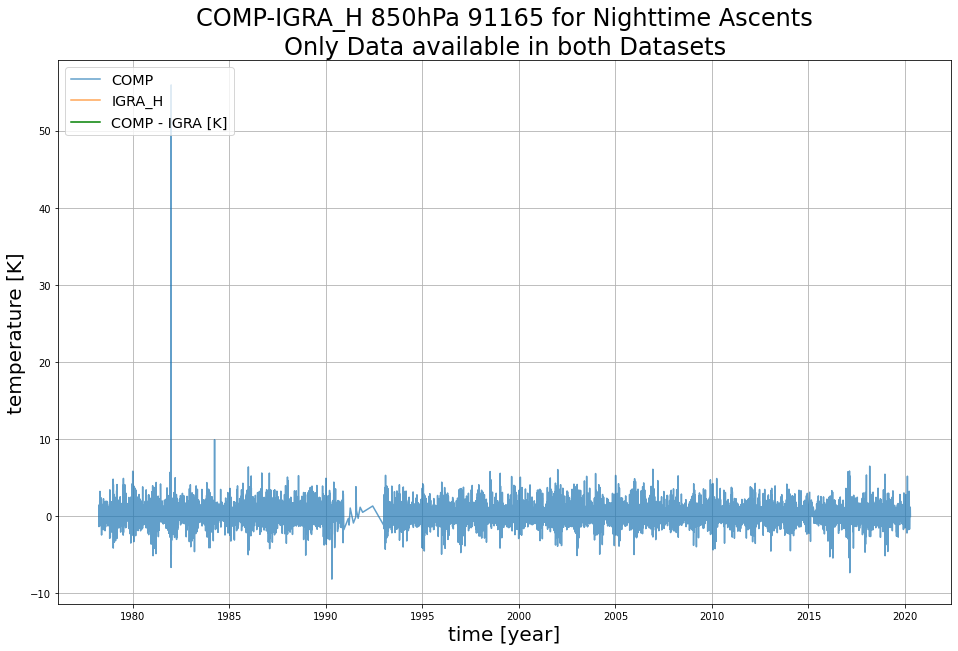

DIFF MEAN: nan
DIFF MIN: nan
DIFF MAX: nan


In [45]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ax1.plot(xax, np.asarray(c.ta), label = 'COMP', alpha=0.7)
    ax1.plot(xax, np.asarray(b.air_temperature), label = 'IGRA_H', alpha=0.7)
    diff = np.asarray(c.ta)-np.asarray(b.air_temperature)
    ax1.plot(xax, diff, label = 'COMP - IGRA [K]', c='green')
    ax1.grid()
    ax1.set(xlabel ='time [year]', ylabel='temperature [K]', title='COMP-IGRA_H '+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents'+'\n'+'Only Data available in both Datasets')
    ax1.legend( loc='upper left')
    plt.show()
    plt.close(fig)
    print('DIFF MEAN: ' + str(diff.mean()))
    print('DIFF MIN: ' + str(diff.min()))
    print('DIFF MAX: ' + str(diff.max()))

## Distribution of Adjustments

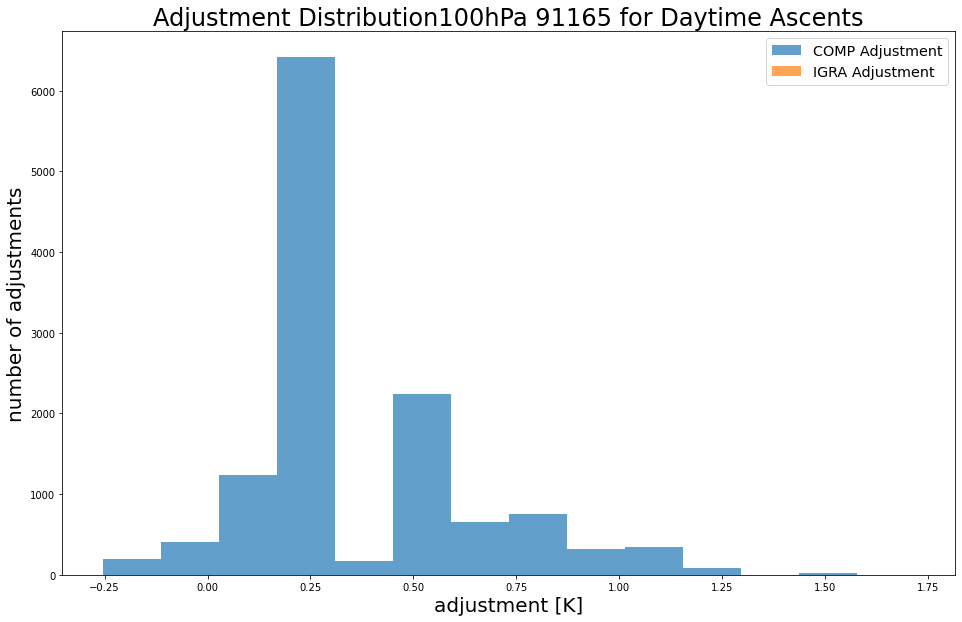

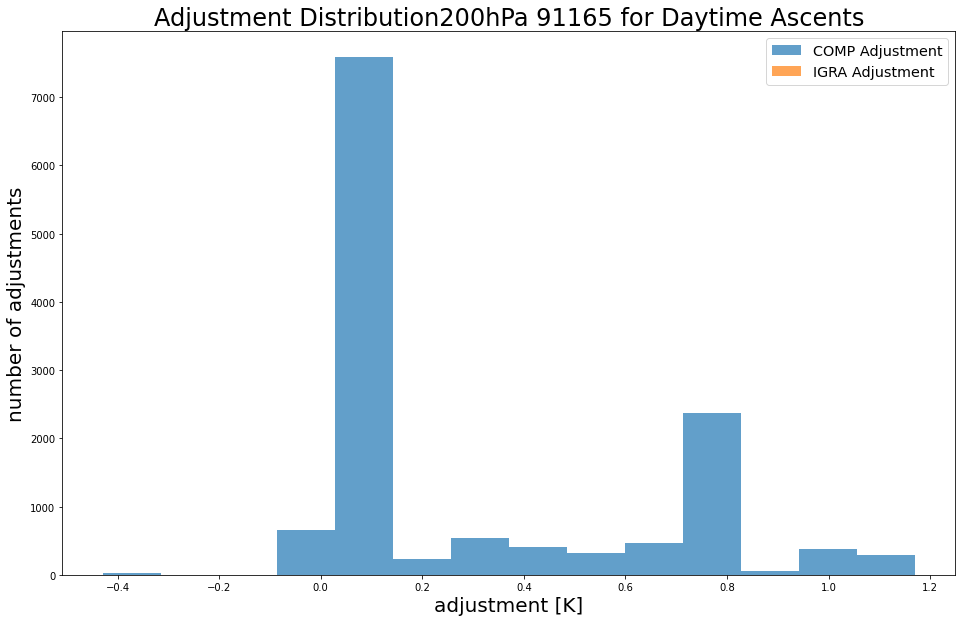

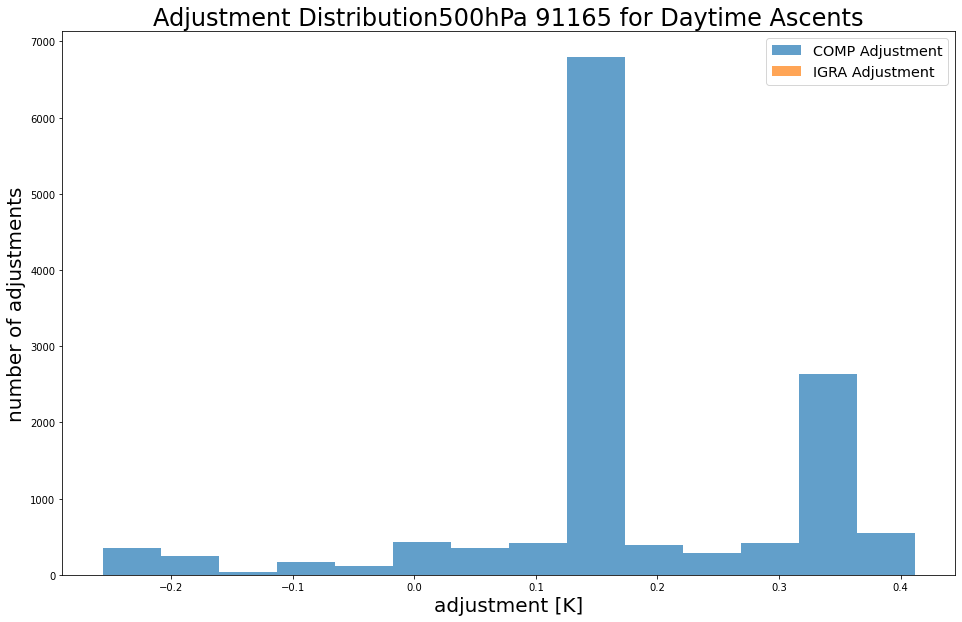

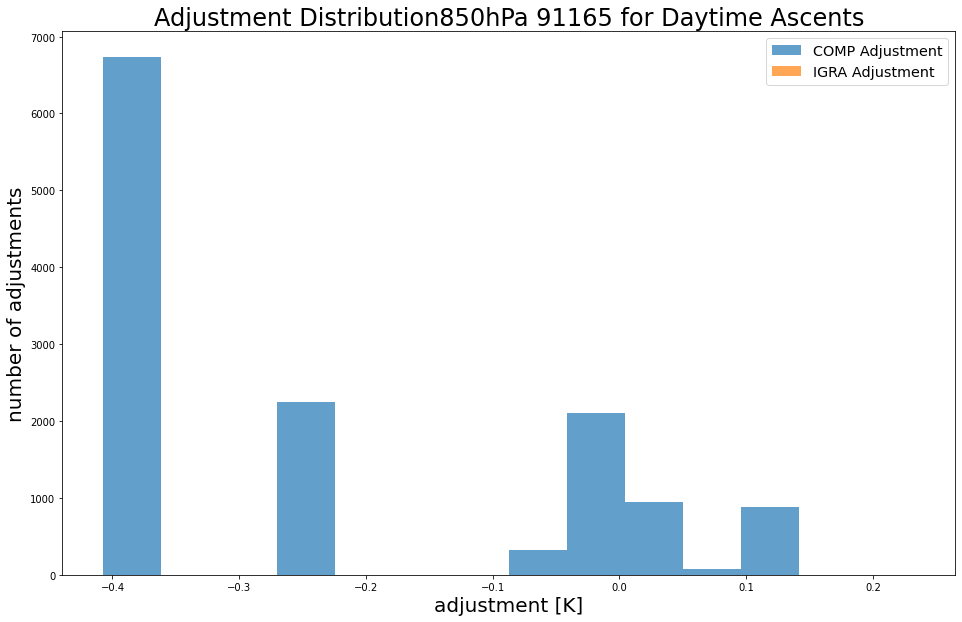

In [46]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 12]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 12]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 12]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)
    
    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment Distribution'+str(preslist[i])+'hPa '+loc+' for Daytime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)

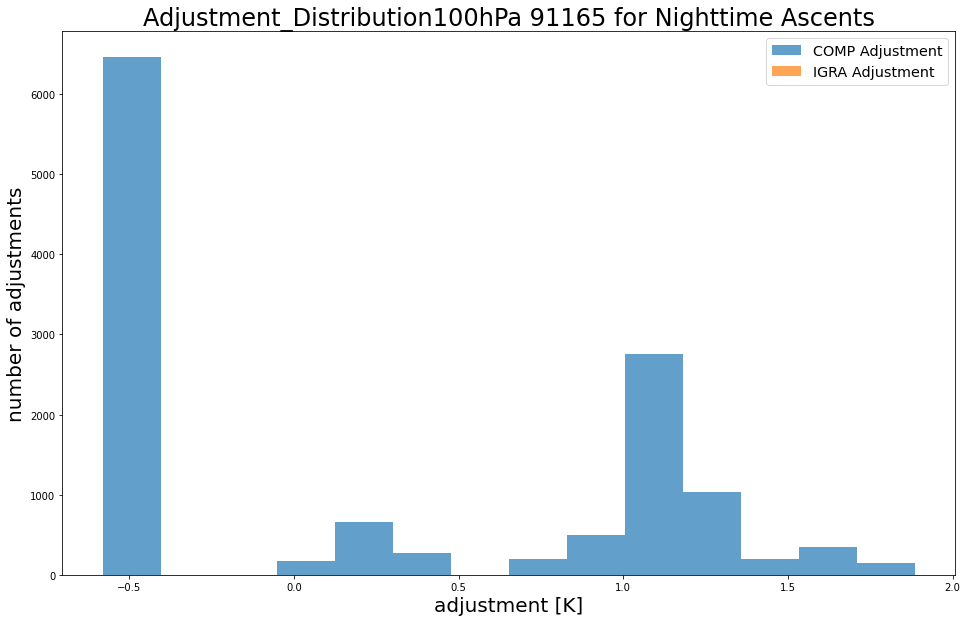

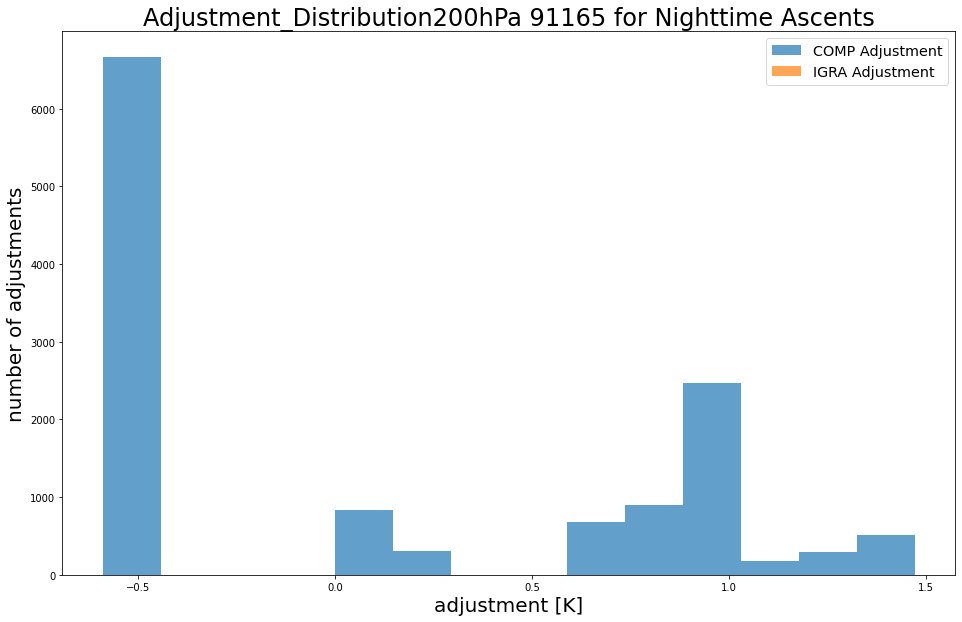

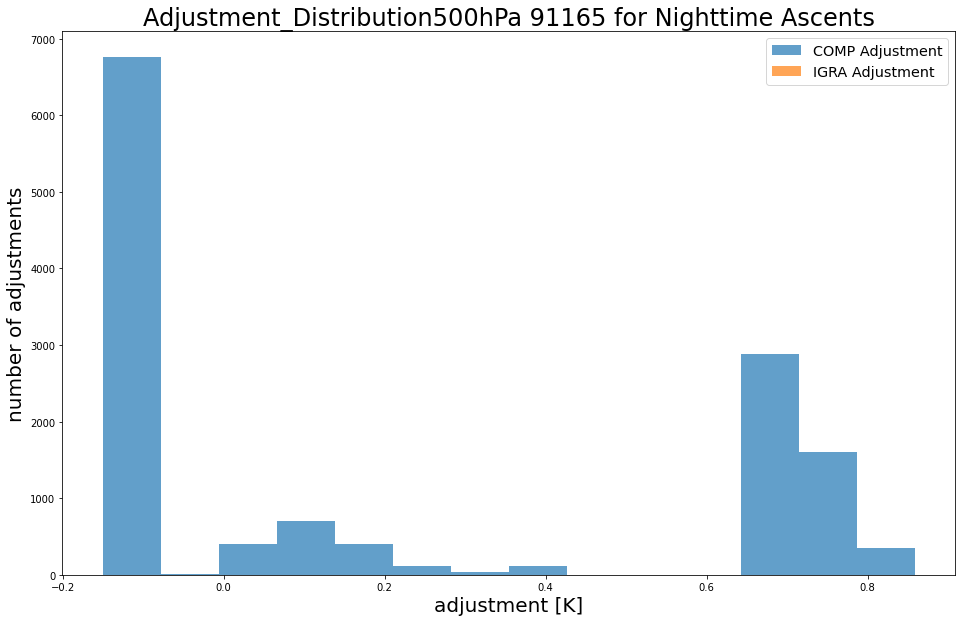

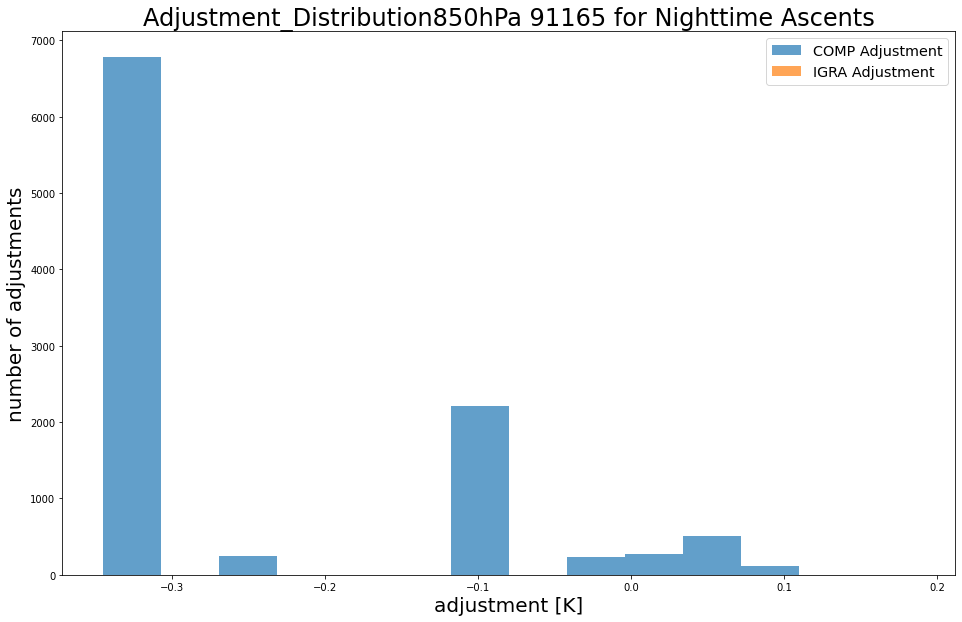

In [47]:
preslist = [100, 200, 500, 850,]
for i in range(len(preslist)):
    a = igra_ma[i]
    a = a[a.report_timestamp.dt.hour == 0]
    b = igra_h_ma[i]
    b = b[b.report_timestamp.dt.hour == 0]
    c = comp_ma[i]
    c = c[c.time.dt.hour == 0]
    xax = np.asarray(c.time)

    fig, (ax1) = plt.subplots(1, 1)

    ca = np.asarray(c.bias_estimate)
    ia = np.asarray(a.air_temperature)-np.asarray(b.air_temperature)
    if np.nanmin(ia) < np.nanmin(ca): binmin = np.nanmin(ia)
    else: binmin = np.nanmin(ca)
    if np.nanmax(ia) > np.nanmax(ca): binmax = np.nanmax(ia)
    else: binmax = np.nanmax(ca)
    bins = np.arange(binmin, binmax, (binmax-binmin)/15.)
    
    ax1.hist(ca, bins=bins, label='COMP Adjustment', alpha=0.7)
    ax1.hist(ia, bins=bins, label='IGRA Adjustment', alpha=0.7)

    ax1.set(xlabel ='adjustment [K]', ylabel='number of adjustments', title='Adjustment_Distribution'+str(preslist[i])+'hPa '+loc+' for Nighttime Ascents')
    ax1.legend( loc='best')
    plt.show()
    plt.close(fig)